#### <center>Projeto Final - {reprograma}</center>

# <center>**Violência contra mulheres nas cidades brasileiras**</center>

Neste _notebook_ apresentamos a análise exploratória realizada para o Projeto "Mapeando o medo: violência contra mulheres nas cidades".

A análise exploratória está estruturada da seguinte forma:

1. Coleta de dados;

2. Tratamento dos dados;

3. Exploração e visualização dos dados;

4. Referências.

### **1. Coleta de dados**

Os dados foram extraídos do Sistema de Informação de Agravos de Notificação (SINAN) através do [DATASUS](https://datasus.saude.gov.br/transferencia-de-arquivos/).

Foi utilizado o banco de dados "VIOL - Violência doméstica, sexual e/ou outras violências" oriundo do [Sistema de Vigilância de Violências e Acidentes (Viva)](http://www.portalsinan.saude.gov.br/violencia-interpessoal-autoprovocada). 

Os arquivos são disponibilizados no padrão DBC (contêiner banco de dados).

Para visualização e descompactação dos arquivos foi utilizado o programa Tab para Windows (TabWin). No TabWin foi realizada também a filtragem dos dados de acordo com o objetivo do projeto.

As filtragens foram realizadas por:

- Unidade Federatica da Notificação
- Ano da Ocorrência: 2010 | 2011 | 2012 | 2013 | 2014 | 2015 | 2016 | 2017 | 2018 | 2019 | 2020
- Local de Ocorrência: Escola | Local de pratica esportiva | Bar ou Similar | Via pública | Comércio/Serviços
- Lesão autoprovocada: 2- Não

A base de dados gerada no TabWin é composta por 410.674 registros e 63 campos.

### **2. Tratamento dos dados**

In [1]:
# importando biliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importando os dados para análise

df = pd.read_csv('../datasets/dados_violencia_local_ocorrencia_sinan_2010_2020.csv', encoding= 'Latin1', low_memory= False)

In [3]:
# modificando o display da tela para melhor visuzalização do df

configurando_display = {
    'max_columns': 999,
    'width': 4096,    
    'max_rows': 999,
    'precision': 2,
}

for op, value in configurando_display.items():
    pd.set_option("display.{}".format(op), value)

In [4]:
# exibindo o df

df

,SG_UF_NOT,ID_MUNICIP,ANO_NASC,CS_SEXO,CS_RACA,CS_ESCOL_N,DT_OCOR,HORA_OCOR,LOCAL_OCOR,LOCAL_ESPE,OUT_VEZES,VIOL_OUTR,VIOL_LEGAL,VIOL_INFAN,VIOL_NEGLI,VIOL_FINAN,VIOL_TRAF,VIOL_SEXU,VIOL_TORT,VIOL_PSICO,VIOL_FISIC,AG_OUTROS,AG_AMEACA,AG_FOGO,AG_ENVEN,AG_QUENTE,AG_CORTE,AG_OBJETO,AG_ENFOR,AG_FORCA,SEX_OUTRO,SEX_EXPLO,SEX_PORNO,SEX_PUDOR,SEX_ESTUPR,SEX_ASSEDI,LESAO_NAT,LESAO_CORP,REL_OUTROS,REL_PROPRI,REL_POL,REL_INST,REL_PATRAO,REL_CUIDA,REL_CONHEC,REL_IRMAO,REL_DESCO,REL_FILHO,REL_EXNAM,REL_NAMO,REL_EXCON,REL_CONJ,REL_PAD,REL_MAE,REL_PAI,AUTOR_ALCO,AUTOR_SEXO,REL_MAD,CICL_VID,VIOL_MOTIV,IDENT_GEN,ORIENT_SEX,EVOLUCAO
0,29,292660,1973.0,F,2.0,2.0,20100108,14:00,7,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,8.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0
1,50,500500,1985.0,M,4.0,2.0,20101225,23:00,6,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,9.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0
2,25,250510,1966.0,M,4.0,1.0,20100105,14:30,6,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,NaN,NaN,NaN,NaN,3.0
3,50,500500,1990.0,F,2.0,4.0,20101225,18:30,6,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,11.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0
4,50,500500,1988.0,M,4.0,3.0,20101231,22:00,6,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410669,28,280030,2008.0,F,4.0,3.0,20201227,NaN,7,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,2.0,2.0,2.0,NaN,1.0,2,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,1.0,2.0,4.0,1.0,8.0,1.0,NaN
410670,51,510792,2006.0,F,4.0,5.0,20190228,15:00,6,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,NaN,2.0,1,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,2.0,1.0,8.0,3.0,NaN
410671,35,353060,2001.0,F,1.0,9.0,20170311,NaN,6,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1.0,2,NaN,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,1.0,2.0,4.0,8.0,8.0,1.0,NaN
410672,33,330455,1986.0,F,4.0,4.0,20101007,NaN,6,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,8.0,8.0,8.0,NaN,8.0,8,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2,2.0,1.0,2.0,4.0,1.0,8.0,1.0,NaN


In [5]:
# conferindo a quantidade de registros e campos

df.shape

(410674, 63)

In [6]:
# listando os campos do df

colunas_df = list(df.columns)
colunas_df

['SG_UF_NOT',
 'ID_MUNICIP',
 'ANO_NASC',
 'CS_SEXO',
 'CS_RACA',
 'CS_ESCOL_N',
 'DT_OCOR',
 'HORA_OCOR',
 'LOCAL_OCOR',
 'LOCAL_ESPE',
 'OUT_VEZES',
 'VIOL_OUTR',
 'VIOL_LEGAL',
 'VIOL_INFAN',
 'VIOL_NEGLI',
 'VIOL_FINAN',
 'VIOL_TRAF',
 'VIOL_SEXU',
 'VIOL_TORT',
 'VIOL_PSICO',
 'VIOL_FISIC',
 'AG_OUTROS',
 'AG_AMEACA',
 'AG_FOGO',
 'AG_ENVEN',
 'AG_QUENTE',
 'AG_CORTE',
 'AG_OBJETO',
 'AG_ENFOR',
 'AG_FORCA',
 'SEX_OUTRO',
 'SEX_EXPLO',
 'SEX_PORNO',
 'SEX_PUDOR',
 'SEX_ESTUPR',
 'SEX_ASSEDI',
 'LESAO_NAT',
 'LESAO_CORP',
 'REL_OUTROS',
 'REL_PROPRI',
 'REL_POL',
 'REL_INST',
 'REL_PATRAO',
 'REL_CUIDA',
 'REL_CONHEC',
 'REL_IRMAO',
 'REL_DESCO',
 'REL_FILHO',
 'REL_EXNAM',
 'REL_NAMO',
 'REL_EXCON',
 'REL_CONJ',
 'REL_PAD',
 'REL_MAE',
 'REL_PAI',
 'AUTOR_ALCO',
 'AUTOR_SEXO',
 'REL_MAD',
 'CICL_VID',
 'VIOL_MOTIV',
 'IDENT_GEN',
 'ORIENT_SEX',
 'EVOLUCAO']

In [7]:
# verificando os tipos dos campos e os registros nulos

df.info(63)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410674 entries, 0 to 410673
Data columns (total 63 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   SG_UF_NOT   410674 non-null  int64  
 1   ID_MUNICIP  410674 non-null  int64  
 2   ANO_NASC    400031 non-null  float64
 3   CS_SEXO     410674 non-null  object 
 4   CS_RACA     405541 non-null  float64
 5   CS_ESCOL_N  386439 non-null  float64
 6   DT_OCOR     410674 non-null  int64  
 7   HORA_OCOR   296338 non-null  object 
 8   LOCAL_OCOR  410674 non-null  int64  
 9   LOCAL_ESPE  144 non-null     object 
 10  OUT_VEZES   409159 non-null  float64
 11  VIOL_OUTR   393494 non-null  float64
 12  VIOL_LEGAL  395273 non-null  float64
 13  VIOL_INFAN  395231 non-null  float64
 14  VIOL_NEGLI  395993 non-null  float64
 15  VIOL_FINAN  395393 non-null  float64
 16  VIOL_TRAF   395300 non-null  float64
 17  VIOL_SEXU   396677 non-null  float64
 18  VIOL_TORT   395630 non-null  float64
 19  VI

#### _2.1. Tratamento do campo SG_UF_NOT_

O campo SG_UF_NOT está associado ao código de siglas das unidades federativas padronizado pelo IBGE.   

Nele é indicada a localização da Unidade de Saúde que realizou a notificação.  

Faremos a substituição dos códigos pelas respectivas siglas.

In [8]:
# realizando as substituições

df['SG_UF_NOT'] = df['SG_UF_NOT'].replace([12, 27, 16, 13, 29, 23, 53, 32, 52, 21, 51, 50, 31, 15, 25, 41, 
                                           26, 22, 24, 43, 33, 11, 14, 42, 35,  28, 17], 
                                         ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 
                                          'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 
                                          'RR', 'SC', 'SP', 'SE', 'TO'])

df.head(3)

,SG_UF_NOT,ID_MUNICIP,ANO_NASC,CS_SEXO,CS_RACA,CS_ESCOL_N,DT_OCOR,HORA_OCOR,LOCAL_OCOR,LOCAL_ESPE,OUT_VEZES,VIOL_OUTR,VIOL_LEGAL,VIOL_INFAN,VIOL_NEGLI,VIOL_FINAN,VIOL_TRAF,VIOL_SEXU,VIOL_TORT,VIOL_PSICO,VIOL_FISIC,AG_OUTROS,AG_AMEACA,AG_FOGO,AG_ENVEN,AG_QUENTE,AG_CORTE,AG_OBJETO,AG_ENFOR,AG_FORCA,SEX_OUTRO,SEX_EXPLO,SEX_PORNO,SEX_PUDOR,SEX_ESTUPR,SEX_ASSEDI,LESAO_NAT,LESAO_CORP,REL_OUTROS,REL_PROPRI,REL_POL,REL_INST,REL_PATRAO,REL_CUIDA,REL_CONHEC,REL_IRMAO,REL_DESCO,REL_FILHO,REL_EXNAM,REL_NAMO,REL_EXCON,REL_CONJ,REL_PAD,REL_MAE,REL_PAI,AUTOR_ALCO,AUTOR_SEXO,REL_MAD,CICL_VID,VIOL_MOTIV,IDENT_GEN,ORIENT_SEX,EVOLUCAO
0,BA,292660,1973.0,F,2.0,2.0,20100108,14:00,7,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,8.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0
1,MS,500500,1985.0,M,4.0,2.0,20101225,23:00,6,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,9.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0
2,PB,250510,1966.0,M,4.0,1.0,20100105,14:30,6,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,NaN,NaN,NaN,NaN,3.0


In [9]:
# renomeando o campo SG_UF_NOT para UF_NOTIFIC

df.rename(columns={'SG_UF_NOT': 'UF_NOTIFIC'}, inplace= True)

df.head(3)

,UF_NOTIFIC,ID_MUNICIP,ANO_NASC,CS_SEXO,CS_RACA,CS_ESCOL_N,DT_OCOR,HORA_OCOR,LOCAL_OCOR,LOCAL_ESPE,OUT_VEZES,VIOL_OUTR,VIOL_LEGAL,VIOL_INFAN,VIOL_NEGLI,VIOL_FINAN,VIOL_TRAF,VIOL_SEXU,VIOL_TORT,VIOL_PSICO,VIOL_FISIC,AG_OUTROS,AG_AMEACA,AG_FOGO,AG_ENVEN,AG_QUENTE,AG_CORTE,AG_OBJETO,AG_ENFOR,AG_FORCA,SEX_OUTRO,SEX_EXPLO,SEX_PORNO,SEX_PUDOR,SEX_ESTUPR,SEX_ASSEDI,LESAO_NAT,LESAO_CORP,REL_OUTROS,REL_PROPRI,REL_POL,REL_INST,REL_PATRAO,REL_CUIDA,REL_CONHEC,REL_IRMAO,REL_DESCO,REL_FILHO,REL_EXNAM,REL_NAMO,REL_EXCON,REL_CONJ,REL_PAD,REL_MAE,REL_PAI,AUTOR_ALCO,AUTOR_SEXO,REL_MAD,CICL_VID,VIOL_MOTIV,IDENT_GEN,ORIENT_SEX,EVOLUCAO
0,BA,292660,1973.0,F,2.0,2.0,20100108,14:00,7,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,8.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0
1,MS,500500,1985.0,M,4.0,2.0,20101225,23:00,6,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,9.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0
2,PB,250510,1966.0,M,4.0,1.0,20100105,14:30,6,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,NaN,NaN,NaN,NaN,3.0


Agora vamos criar o campo RG_NOTIFIC para categorizar os estados por região.

In [10]:
# categorizando o campo UF_NOTIFIC e criando o campo RG_NOTIFIC

df.loc[(df['UF_NOTIFIC'] == 'PB') | (df['UF_NOTIFIC'] == 'CE') | (df['UF_NOTIFIC'] == 'RN') | (df['UF_NOTIFIC'] == 'SE')
       | (df['UF_NOTIFIC'] == 'PE') | (df['UF_NOTIFIC'] == 'MA') | (df['UF_NOTIFIC'] == 'AL') | (df['UF_NOTIFIC'] == 'BA')
       | (df['UF_NOTIFIC'] == 'PI'),'RG_NOTIFIC'] = 'Nordeste'

df.loc[(df['UF_NOTIFIC'] == 'PA') | (df['UF_NOTIFIC'] == 'TO') | (df['UF_NOTIFIC'] == 'AM') | (df['UF_NOTIFIC'] == 'RO')
       | (df['UF_NOTIFIC'] == 'RR') | (df['UF_NOTIFIC'] == 'AP') | (df['UF_NOTIFIC'] == 'AC'),'RG_NOTIFIC'] = 'Norte'

df.loc[(df['UF_NOTIFIC'] == 'MG') | (df['UF_NOTIFIC'] == 'SP') | (df['UF_NOTIFIC'] == 'RJ') | (df['UF_NOTIFIC'] == 'ES'), 'RG_NOTIFIC'] = 'Sudeste'

df.loc[(df['UF_NOTIFIC'] == 'RS') | (df['UF_NOTIFIC'] == 'SC') | (df['UF_NOTIFIC'] == 'PR'),'RG_NOTIFIC'] = 'Sul'

df.loc[(df['UF_NOTIFIC'] == 'GO') | (df['UF_NOTIFIC'] == 'DF') | (df['UF_NOTIFIC'] == 'MT') | (df['UF_NOTIFIC'] == 'MS'),'RG_NOTIFIC'] = 'Centro-Oeste'

df.head(3)

C:\Users\Delson\AppData\Local\Temp\ipykernel_13056\85578364.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Nordeste' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df['UF_NOTIFIC'] == 'PB') | (df['UF_NOTIFIC'] == 'CE') | (df['UF_NOTIFIC'] == 'RN') | (df['UF_NOTIFIC'] == 'SE')


,UF_NOTIFIC,ID_MUNICIP,ANO_NASC,CS_SEXO,CS_RACA,CS_ESCOL_N,DT_OCOR,HORA_OCOR,LOCAL_OCOR,LOCAL_ESPE,OUT_VEZES,VIOL_OUTR,VIOL_LEGAL,VIOL_INFAN,VIOL_NEGLI,VIOL_FINAN,VIOL_TRAF,VIOL_SEXU,VIOL_TORT,VIOL_PSICO,VIOL_FISIC,AG_OUTROS,AG_AMEACA,AG_FOGO,AG_ENVEN,AG_QUENTE,AG_CORTE,AG_OBJETO,AG_ENFOR,AG_FORCA,SEX_OUTRO,SEX_EXPLO,SEX_PORNO,SEX_PUDOR,SEX_ESTUPR,SEX_ASSEDI,LESAO_NAT,LESAO_CORP,REL_OUTROS,REL_PROPRI,REL_POL,REL_INST,REL_PATRAO,REL_CUIDA,REL_CONHEC,REL_IRMAO,REL_DESCO,REL_FILHO,REL_EXNAM,REL_NAMO,REL_EXCON,REL_CONJ,REL_PAD,REL_MAE,REL_PAI,AUTOR_ALCO,AUTOR_SEXO,REL_MAD,CICL_VID,VIOL_MOTIV,IDENT_GEN,ORIENT_SEX,EVOLUCAO,RG_NOTIFIC
0,BA,292660,1973.0,F,2.0,2.0,20100108,14:00,7,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,8.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0,Nordeste
1,MS,500500,1985.0,M,4.0,2.0,20101225,23:00,6,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,9.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0,Centro-Oeste
2,PB,250510,1966.0,M,4.0,1.0,20100105,14:30,6,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,NaN,NaN,NaN,NaN,3.0,Nordeste


In [11]:
# mudando a posição do campo RG_NOTIFIC

mover_rg_notific = df.pop('RG_NOTIFIC')

df.insert(0, 'RG_NOTIFIC', mover_rg_notific)

df.head(3)

,RG_NOTIFIC,UF_NOTIFIC,ID_MUNICIP,ANO_NASC,CS_SEXO,CS_RACA,CS_ESCOL_N,DT_OCOR,HORA_OCOR,LOCAL_OCOR,LOCAL_ESPE,OUT_VEZES,VIOL_OUTR,VIOL_LEGAL,VIOL_INFAN,VIOL_NEGLI,VIOL_FINAN,VIOL_TRAF,VIOL_SEXU,VIOL_TORT,VIOL_PSICO,VIOL_FISIC,AG_OUTROS,AG_AMEACA,AG_FOGO,AG_ENVEN,AG_QUENTE,AG_CORTE,AG_OBJETO,AG_ENFOR,AG_FORCA,SEX_OUTRO,SEX_EXPLO,SEX_PORNO,SEX_PUDOR,SEX_ESTUPR,SEX_ASSEDI,LESAO_NAT,LESAO_CORP,REL_OUTROS,REL_PROPRI,REL_POL,REL_INST,REL_PATRAO,REL_CUIDA,REL_CONHEC,REL_IRMAO,REL_DESCO,REL_FILHO,REL_EXNAM,REL_NAMO,REL_EXCON,REL_CONJ,REL_PAD,REL_MAE,REL_PAI,AUTOR_ALCO,AUTOR_SEXO,REL_MAD,CICL_VID,VIOL_MOTIV,IDENT_GEN,ORIENT_SEX,EVOLUCAO
0,Nordeste,BA,292660,1973.0,F,2.0,2.0,20100108,14:00,7,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,8.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0
1,Centro-Oeste,MS,500500,1985.0,M,4.0,2.0,20101225,23:00,6,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,9.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0
2,Nordeste,PB,250510,1966.0,M,4.0,1.0,20100105,14:30,6,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,NaN,NaN,NaN,NaN,3.0


In [12]:
# verificando os rótulos do campo RG_NOTIFIC

df['RG_NOTIFIC'].unique()

array(['Nordeste', 'Centro-Oeste', 'Sudeste', 'Sul', 'Norte'],
      dtype=object)

#### _2.2. Tratamento do campo ANO_NASC_

O campo ANO_NASC registra a data de nascimento das vítimas.  

Esse campo possui 10.643 registros nulos, 2,5% em relação ao total de registros.  

De modo a interferir pouco sobre o resultado geral, iremos preencher os registros nulos com a média dos anos de nascimento.  

In [13]:
# verificando a quantidade de registros nulos

df['ANO_NASC'].isnull().sum()

10643

In [14]:
# calculando a média do campo ANO_NASC

media_ano_nasc = df['ANO_NASC'].mean()
media_ano_nasc

1989.923075961613

O ano médio de nascimento das vítimas é 1989.

In [15]:
# preenchendo os registros nulos com a média dos anos de nascimento

df['ANO_NASC'] = df['ANO_NASC'].fillna(media_ano_nasc)

In [16]:
# conferindo se todos os registros nulos foram preenchidos

df['ANO_NASC'].isnull().sum()

0

Agora vamos criar o campo IDADE para calcular e armazenar a idade das vítimas.

In [17]:
# criando o campo IDADE e calculando a idade das vítimas

ano_referencia = 2023

df['IDADE'] = ano_referencia - df['ANO_NASC']

# arredondando e alterando o tipo do campo para int

df['IDADE'] = (round(df['IDADE'])).values.astype(np.int64)

df.head(3)

,RG_NOTIFIC,UF_NOTIFIC,ID_MUNICIP,ANO_NASC,CS_SEXO,CS_RACA,CS_ESCOL_N,DT_OCOR,HORA_OCOR,LOCAL_OCOR,LOCAL_ESPE,OUT_VEZES,VIOL_OUTR,VIOL_LEGAL,VIOL_INFAN,VIOL_NEGLI,VIOL_FINAN,VIOL_TRAF,VIOL_SEXU,VIOL_TORT,VIOL_PSICO,VIOL_FISIC,AG_OUTROS,AG_AMEACA,AG_FOGO,AG_ENVEN,AG_QUENTE,AG_CORTE,AG_OBJETO,AG_ENFOR,AG_FORCA,SEX_OUTRO,SEX_EXPLO,SEX_PORNO,SEX_PUDOR,SEX_ESTUPR,SEX_ASSEDI,LESAO_NAT,LESAO_CORP,REL_OUTROS,REL_PROPRI,REL_POL,REL_INST,REL_PATRAO,REL_CUIDA,REL_CONHEC,REL_IRMAO,REL_DESCO,REL_FILHO,REL_EXNAM,REL_NAMO,REL_EXCON,REL_CONJ,REL_PAD,REL_MAE,REL_PAI,AUTOR_ALCO,AUTOR_SEXO,REL_MAD,CICL_VID,VIOL_MOTIV,IDENT_GEN,ORIENT_SEX,EVOLUCAO,IDADE
0,Nordeste,BA,292660,1973.0,F,2.0,2.0,20100108,14:00,7,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,8.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0,50
1,Centro-Oeste,MS,500500,1985.0,M,4.0,2.0,20101225,23:00,6,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,9.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0,38
2,Nordeste,PB,250510,1966.0,M,4.0,1.0,20100105,14:30,6,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,NaN,NaN,NaN,NaN,3.0,57


Agora vamos criar o campo FAIXA ETÁRIA tendo como base o campo IDADE.

In [18]:
# categorizando o campo IDADE por faixa etária

df.loc[df['IDADE'] <= 14, 'FAIXA_ETARIA'] = '0-14'
df.loc[(df['IDADE'] > 14) & (df['IDADE'] <= 29), 'FAIXA_ETARIA'] = '15-29'
df.loc[(df['IDADE'] > 29) & (df['IDADE'] <= 44), 'FAIXA_ETARIA'] = '30-44'
df.loc[(df['IDADE'] > 44) & (df['IDADE'] <= 65), 'FAIXA_ETARIA'] = '45-65'
df.loc[df['IDADE'] > 65, 'FAIXA_ETARIA'] = '65+'

df

C:\Users\Delson\AppData\Local\Temp\ipykernel_13056\1668140450.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0-14' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['IDADE'] <= 14, 'FAIXA_ETARIA'] = '0-14'


,RG_NOTIFIC,UF_NOTIFIC,ID_MUNICIP,ANO_NASC,CS_SEXO,CS_RACA,CS_ESCOL_N,DT_OCOR,HORA_OCOR,LOCAL_OCOR,LOCAL_ESPE,OUT_VEZES,VIOL_OUTR,VIOL_LEGAL,VIOL_INFAN,VIOL_NEGLI,VIOL_FINAN,VIOL_TRAF,VIOL_SEXU,VIOL_TORT,VIOL_PSICO,VIOL_FISIC,AG_OUTROS,AG_AMEACA,AG_FOGO,AG_ENVEN,AG_QUENTE,AG_CORTE,AG_OBJETO,AG_ENFOR,AG_FORCA,SEX_OUTRO,SEX_EXPLO,SEX_PORNO,SEX_PUDOR,SEX_ESTUPR,SEX_ASSEDI,LESAO_NAT,LESAO_CORP,REL_OUTROS,REL_PROPRI,REL_POL,REL_INST,REL_PATRAO,REL_CUIDA,REL_CONHEC,REL_IRMAO,REL_DESCO,REL_FILHO,REL_EXNAM,REL_NAMO,REL_EXCON,REL_CONJ,REL_PAD,REL_MAE,REL_PAI,AUTOR_ALCO,AUTOR_SEXO,REL_MAD,CICL_VID,VIOL_MOTIV,IDENT_GEN,ORIENT_SEX,EVOLUCAO,IDADE,FAIXA_ETARIA
0,Nordeste,BA,292660,1973.0,F,2.0,2.0,20100108,14:00,7,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,8.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0,50,45-65
1,Centro-Oeste,MS,500500,1985.0,M,4.0,2.0,20101225,23:00,6,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,9.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0,38,30-44
2,Nordeste,PB,250510,1966.0,M,4.0,1.0,20100105,14:30,6,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,NaN,NaN,NaN,NaN,3.0,57,45-65
3,Centro-Oeste,MS,500500,1990.0,F,2.0,4.0,20101225,18:30,6,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,11.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0,33,30-44
4,Centro-Oeste,MS,500500,1988.0,M,4.0,3.0,20101231,22:00,6,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0,35,30-44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410669,Nordeste,SE,280030,2008.0,F,4.0,3.0,20201227,NaN,7,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,2.0,2.0,2.0,NaN,1.0,2,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,1.0,2.0,4.0,1.0,8.0,1.0,NaN,15,15-29
410670,Centro-Oeste,MT,510792,2006.0,F,4.0,5.0,20190228,15:00,6,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,NaN,2.0,1,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,2.0,1.0,8.0,3.0,NaN,17,15-29
410671,Sudeste,SP,353060,2001.0,F,1.0,9.0,20170311,NaN,6,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1.0,2,NaN,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,1.0,2.0,4.0,8.0,8.0,1.0,NaN,22,15-29
410672,Sul,RS,330455,1986.0,F,4.0,4.0,20101007,NaN,6,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,8.0,8.0,8.0,NaN,8.0,8,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2,2.0,1.0,2.0,4.0,1.0,8.0,1.0,NaN,37,30-44


In [19]:
# mudando a posição dos campos IDADE e FAIXA_ETARIA

mover_idade = df.pop('IDADE')

df.insert(4, 'IDADE', mover_idade)

mover_faixa_etaria = df.pop('FAIXA_ETARIA')

df.insert(5, 'FAIXA_ETARIA', mover_faixa_etaria)

df.head(3)

,RG_NOTIFIC,UF_NOTIFIC,ID_MUNICIP,ANO_NASC,IDADE,FAIXA_ETARIA,CS_SEXO,CS_RACA,CS_ESCOL_N,DT_OCOR,HORA_OCOR,LOCAL_OCOR,LOCAL_ESPE,OUT_VEZES,VIOL_OUTR,VIOL_LEGAL,VIOL_INFAN,VIOL_NEGLI,VIOL_FINAN,VIOL_TRAF,VIOL_SEXU,VIOL_TORT,VIOL_PSICO,VIOL_FISIC,AG_OUTROS,AG_AMEACA,AG_FOGO,AG_ENVEN,AG_QUENTE,AG_CORTE,AG_OBJETO,AG_ENFOR,AG_FORCA,SEX_OUTRO,SEX_EXPLO,SEX_PORNO,SEX_PUDOR,SEX_ESTUPR,SEX_ASSEDI,LESAO_NAT,LESAO_CORP,REL_OUTROS,REL_PROPRI,REL_POL,REL_INST,REL_PATRAO,REL_CUIDA,REL_CONHEC,REL_IRMAO,REL_DESCO,REL_FILHO,REL_EXNAM,REL_NAMO,REL_EXCON,REL_CONJ,REL_PAD,REL_MAE,REL_PAI,AUTOR_ALCO,AUTOR_SEXO,REL_MAD,CICL_VID,VIOL_MOTIV,IDENT_GEN,ORIENT_SEX,EVOLUCAO
0,Nordeste,BA,292660,1973.0,50,45-65,F,2.0,2.0,20100108,14:00,7,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,8.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0
1,Centro-Oeste,MS,500500,1985.0,38,30-44,M,4.0,2.0,20101225,23:00,6,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,9.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0
2,Nordeste,PB,250510,1966.0,57,45-65,M,4.0,1.0,20100105,14:30,6,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,NaN,NaN,NaN,NaN,3.0


#### _2.3. Tratando o campo CS_SEXO_

O campo CS_SEXO registra o sexo da vítima.

Esse campo não possui dados nulos.  

Aqui faremos a substituição dos códigos pelas respectivas categorias. São elas:
 
M - Masculino  
F - Feminino  
I - Sem informação  

In [20]:
# verificando a quantidade de registros nulos

df['CS_SEXO'].isnull().sum()

0

In [21]:
# realizando as substituições

df['CS_SEXO'] = df['CS_SEXO'].replace(['M', 'F', 'I'], 
                                      ['Masculino', 'Feminino', 'Sem informação'])

In [22]:
# verificando os rótulos das substituições

df['CS_SEXO'].unique()

array(['Feminino', 'Masculino', 'Sem informação'], dtype=object)

In [23]:
# renomeando o campo CS_SEXO para SEXO

df.rename(columns={'CS_SEXO': 'SEXO'}, inplace= True)

df.head(3)

,RG_NOTIFIC,UF_NOTIFIC,ID_MUNICIP,ANO_NASC,IDADE,FAIXA_ETARIA,SEXO,CS_RACA,CS_ESCOL_N,DT_OCOR,HORA_OCOR,LOCAL_OCOR,LOCAL_ESPE,OUT_VEZES,VIOL_OUTR,VIOL_LEGAL,VIOL_INFAN,VIOL_NEGLI,VIOL_FINAN,VIOL_TRAF,VIOL_SEXU,VIOL_TORT,VIOL_PSICO,VIOL_FISIC,AG_OUTROS,AG_AMEACA,AG_FOGO,AG_ENVEN,AG_QUENTE,AG_CORTE,AG_OBJETO,AG_ENFOR,AG_FORCA,SEX_OUTRO,SEX_EXPLO,SEX_PORNO,SEX_PUDOR,SEX_ESTUPR,SEX_ASSEDI,LESAO_NAT,LESAO_CORP,REL_OUTROS,REL_PROPRI,REL_POL,REL_INST,REL_PATRAO,REL_CUIDA,REL_CONHEC,REL_IRMAO,REL_DESCO,REL_FILHO,REL_EXNAM,REL_NAMO,REL_EXCON,REL_CONJ,REL_PAD,REL_MAE,REL_PAI,AUTOR_ALCO,AUTOR_SEXO,REL_MAD,CICL_VID,VIOL_MOTIV,IDENT_GEN,ORIENT_SEX,EVOLUCAO
0,Nordeste,BA,292660,1973.0,50,45-65,Feminino,2.0,2.0,20100108,14:00,7,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,8.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0
1,Centro-Oeste,MS,500500,1985.0,38,30-44,Masculino,4.0,2.0,20101225,23:00,6,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,9.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0
2,Nordeste,PB,250510,1966.0,57,45-65,Masculino,4.0,1.0,20100105,14:30,6,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,NaN,NaN,NaN,NaN,3.0


#### _2.4. Tratando o campo CS_RACA_

O campo CS_RACA registra a raça/cor declarada pela vítima. 

Aqui faremos a substituição dos códigos pelas respectivas categorias. São elas:

1 - branca  
2 - preta  
3 - amarela  
4 - parda  
5 - indígena  
9 - sem informação 

O campo CS_RACA possui 5.133 registros nulos, 1,2% em relação ao total de registros, que serão considerados como ignorados na coleta, conforme categorização do SINAN.

In [24]:
# verificando a quantidade de registros nulos

df['CS_RACA'].isnull().sum()

5133

In [25]:
# preenchendo os resgistros nulos

df['CS_RACA'] = df['CS_RACA'].fillna(9)

# conferindo se todos os registros nulos foram preenchidos

df['CS_RACA'].isnull().sum()

0

In [26]:
# realizando as substituições

df['CS_RACA'] = df['CS_RACA'].replace([1, 2, 3, 4, 5, 9], 
                                      ['Branca', 'Preta', 'Amarela', 'Parda', 'Indígena', 'Sem informação'])

In [27]:
# verificando os rótulos das substituições

df['CS_RACA'].unique()

array(['Preta', 'Parda', 'Sem informação', 'Branca', 'Indígena',
       'Amarela'], dtype=object)

In [28]:
# renomeando o campo CS_RACA para RACA_COR

df.rename(columns={'CS_RACA': 'RACA_COR'}, inplace= True)

df.head(3)

,RG_NOTIFIC,UF_NOTIFIC,ID_MUNICIP,ANO_NASC,IDADE,FAIXA_ETARIA,SEXO,RACA_COR,CS_ESCOL_N,DT_OCOR,HORA_OCOR,LOCAL_OCOR,LOCAL_ESPE,OUT_VEZES,VIOL_OUTR,VIOL_LEGAL,VIOL_INFAN,VIOL_NEGLI,VIOL_FINAN,VIOL_TRAF,VIOL_SEXU,VIOL_TORT,VIOL_PSICO,VIOL_FISIC,AG_OUTROS,AG_AMEACA,AG_FOGO,AG_ENVEN,AG_QUENTE,AG_CORTE,AG_OBJETO,AG_ENFOR,AG_FORCA,SEX_OUTRO,SEX_EXPLO,SEX_PORNO,SEX_PUDOR,SEX_ESTUPR,SEX_ASSEDI,LESAO_NAT,LESAO_CORP,REL_OUTROS,REL_PROPRI,REL_POL,REL_INST,REL_PATRAO,REL_CUIDA,REL_CONHEC,REL_IRMAO,REL_DESCO,REL_FILHO,REL_EXNAM,REL_NAMO,REL_EXCON,REL_CONJ,REL_PAD,REL_MAE,REL_PAI,AUTOR_ALCO,AUTOR_SEXO,REL_MAD,CICL_VID,VIOL_MOTIV,IDENT_GEN,ORIENT_SEX,EVOLUCAO
0,Nordeste,BA,292660,1973.0,50,45-65,Feminino,Preta,2.0,20100108,14:00,7,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,8.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0
1,Centro-Oeste,MS,500500,1985.0,38,30-44,Masculino,Parda,2.0,20101225,23:00,6,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,9.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0
2,Nordeste,PB,250510,1966.0,57,45-65,Masculino,Parda,1.0,20100105,14:30,6,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,NaN,NaN,NaN,NaN,3.0


#### _2.5. Tratando o campo CS_ESCOL_N_

O campo CS_ESCOL_N registra o grau de instrução das vítimas e está associado ao código de categorização do SINAN. 

Aqui utilizaremos uma categorização distinta.

Será criado o campo ESCOLARIDADE e a categorização será feita da seguinte forma:

- Analfabeto(a): pessoas não alfabetizadas;  
- Ensino fundamental: pessoas com ensino fundamental completo ou incompleto;  
- Ensino médio: pessoas com ensino médio completo ou incompleto;  
- Ensino superior: pessoas com ensino superior completo ou incompleto;  
- Sem informação: dados não coletados e nulos.

O campo CS_ESCOL_N será excluído.


O campo possui 24.235 registros nulos (5,9%) que serão considerados como ignorados na coleta, conforme categorização do SINAN.
O código atribuído aos dados ignorados é o 9.

In [29]:
# verificando a quantidade de registros nulos

df['CS_ESCOL_N'].isnull().sum()

24235

In [30]:
# preenchendo os resgistros nulos

df['CS_ESCOL_N'] = df['CS_ESCOL_N'].fillna(9)

# conferindo se todos os registros nulos foram preenchidos

df['CS_ESCOL_N'].isnull().sum()

0

In [31]:
# categorizando o campo CS_ESCOL_N e criando o campo ESCOLARIDADE

df.loc[(df['CS_ESCOL_N'] == 43) ,'ESCOLARIDADE'] = 'Analfabeto(a)'

df.loc[(df['CS_ESCOL_N'] == 1) | (df['CS_ESCOL_N'] == 2) | (df['CS_ESCOL_N'] == 3) | (df['CS_ESCOL_N'] == 4)
       ,'ESCOLARIDADE'] = 'Ensino fundamental'

df.loc[(df['CS_ESCOL_N'] == 5) | (df['CS_ESCOL_N'] == 6),'ESCOLARIDADE'] = 'Ensino médio'

df.loc[(df['CS_ESCOL_N'] == 7) | (df['CS_ESCOL_N'] == 8), 'ESCOLARIDADE'] = 'Ensino superior'

df.loc[(df['CS_ESCOL_N'] == 9) | (df['CS_ESCOL_N'] == 10) | (df['CS_ESCOL_N'] == 0),'ESCOLARIDADE'] = 'Sem informação'

df.head(3)

C:\Users\Delson\AppData\Local\Temp\ipykernel_13056\1395610721.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Analfabeto(a)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df['CS_ESCOL_N'] == 43) ,'ESCOLARIDADE'] = 'Analfabeto(a)'


,RG_NOTIFIC,UF_NOTIFIC,ID_MUNICIP,ANO_NASC,IDADE,FAIXA_ETARIA,SEXO,RACA_COR,CS_ESCOL_N,DT_OCOR,HORA_OCOR,LOCAL_OCOR,LOCAL_ESPE,OUT_VEZES,VIOL_OUTR,VIOL_LEGAL,VIOL_INFAN,VIOL_NEGLI,VIOL_FINAN,VIOL_TRAF,VIOL_SEXU,VIOL_TORT,VIOL_PSICO,VIOL_FISIC,AG_OUTROS,AG_AMEACA,AG_FOGO,AG_ENVEN,AG_QUENTE,AG_CORTE,AG_OBJETO,AG_ENFOR,AG_FORCA,SEX_OUTRO,SEX_EXPLO,SEX_PORNO,SEX_PUDOR,SEX_ESTUPR,SEX_ASSEDI,LESAO_NAT,LESAO_CORP,REL_OUTROS,REL_PROPRI,REL_POL,REL_INST,REL_PATRAO,REL_CUIDA,REL_CONHEC,REL_IRMAO,REL_DESCO,REL_FILHO,REL_EXNAM,REL_NAMO,REL_EXCON,REL_CONJ,REL_PAD,REL_MAE,REL_PAI,AUTOR_ALCO,AUTOR_SEXO,REL_MAD,CICL_VID,VIOL_MOTIV,IDENT_GEN,ORIENT_SEX,EVOLUCAO,ESCOLARIDADE
0,Nordeste,BA,292660,1973.0,50,45-65,Feminino,Preta,2.0,20100108,14:00,7,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,8.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0,Ensino fundamental
1,Centro-Oeste,MS,500500,1985.0,38,30-44,Masculino,Parda,2.0,20101225,23:00,6,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,9.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0,Ensino fundamental
2,Nordeste,PB,250510,1966.0,57,45-65,Masculino,Parda,1.0,20100105,14:30,6,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,NaN,NaN,NaN,NaN,3.0,Ensino fundamental


In [32]:
# verificando os rótulos da categorização criada

df['ESCOLARIDADE'].unique()

array(['Ensino fundamental', 'Sem informação', 'Ensino médio',
       'Ensino superior'], dtype=object)

In [33]:
# mudando a posição do campo ESCOLARIDADE

mover_escolaridade = df.pop('ESCOLARIDADE')

df.insert(8, 'ESCOLARIDADE', mover_escolaridade)

df.head(3)

,RG_NOTIFIC,UF_NOTIFIC,ID_MUNICIP,ANO_NASC,IDADE,FAIXA_ETARIA,SEXO,RACA_COR,ESCOLARIDADE,CS_ESCOL_N,DT_OCOR,HORA_OCOR,LOCAL_OCOR,LOCAL_ESPE,OUT_VEZES,VIOL_OUTR,VIOL_LEGAL,VIOL_INFAN,VIOL_NEGLI,VIOL_FINAN,VIOL_TRAF,VIOL_SEXU,VIOL_TORT,VIOL_PSICO,VIOL_FISIC,AG_OUTROS,AG_AMEACA,AG_FOGO,AG_ENVEN,AG_QUENTE,AG_CORTE,AG_OBJETO,AG_ENFOR,AG_FORCA,SEX_OUTRO,SEX_EXPLO,SEX_PORNO,SEX_PUDOR,SEX_ESTUPR,SEX_ASSEDI,LESAO_NAT,LESAO_CORP,REL_OUTROS,REL_PROPRI,REL_POL,REL_INST,REL_PATRAO,REL_CUIDA,REL_CONHEC,REL_IRMAO,REL_DESCO,REL_FILHO,REL_EXNAM,REL_NAMO,REL_EXCON,REL_CONJ,REL_PAD,REL_MAE,REL_PAI,AUTOR_ALCO,AUTOR_SEXO,REL_MAD,CICL_VID,VIOL_MOTIV,IDENT_GEN,ORIENT_SEX,EVOLUCAO
0,Nordeste,BA,292660,1973.0,50,45-65,Feminino,Preta,Ensino fundamental,2.0,20100108,14:00,7,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,8.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0
1,Centro-Oeste,MS,500500,1985.0,38,30-44,Masculino,Parda,Ensino fundamental,2.0,20101225,23:00,6,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,9.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0
2,Nordeste,PB,250510,1966.0,57,45-65,Masculino,Parda,Ensino fundamental,1.0,20100105,14:30,6,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,NaN,NaN,NaN,NaN,3.0


In [34]:
# excluindo o campo CS_ESCOL_N

df.drop(columns=['CS_ESCOL_N'], axis=1, inplace=True)

df.head(3)

,RG_NOTIFIC,UF_NOTIFIC,ID_MUNICIP,ANO_NASC,IDADE,FAIXA_ETARIA,SEXO,RACA_COR,ESCOLARIDADE,DT_OCOR,HORA_OCOR,LOCAL_OCOR,LOCAL_ESPE,OUT_VEZES,VIOL_OUTR,VIOL_LEGAL,VIOL_INFAN,VIOL_NEGLI,VIOL_FINAN,VIOL_TRAF,VIOL_SEXU,VIOL_TORT,VIOL_PSICO,VIOL_FISIC,AG_OUTROS,AG_AMEACA,AG_FOGO,AG_ENVEN,AG_QUENTE,AG_CORTE,AG_OBJETO,AG_ENFOR,AG_FORCA,SEX_OUTRO,SEX_EXPLO,SEX_PORNO,SEX_PUDOR,SEX_ESTUPR,SEX_ASSEDI,LESAO_NAT,LESAO_CORP,REL_OUTROS,REL_PROPRI,REL_POL,REL_INST,REL_PATRAO,REL_CUIDA,REL_CONHEC,REL_IRMAO,REL_DESCO,REL_FILHO,REL_EXNAM,REL_NAMO,REL_EXCON,REL_CONJ,REL_PAD,REL_MAE,REL_PAI,AUTOR_ALCO,AUTOR_SEXO,REL_MAD,CICL_VID,VIOL_MOTIV,IDENT_GEN,ORIENT_SEX,EVOLUCAO
0,Nordeste,BA,292660,1973.0,50,45-65,Feminino,Preta,Ensino fundamental,20100108,14:00,7,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,8.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0
1,Centro-Oeste,MS,500500,1985.0,38,30-44,Masculino,Parda,Ensino fundamental,20101225,23:00,6,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,9.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0
2,Nordeste,PB,250510,1966.0,57,45-65,Masculino,Parda,Ensino fundamental,20100105,14:30,6,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,NaN,NaN,NaN,NaN,3.0


#### _2.6. Tratando o campo DT_OCOR_

O campo DT_OCOR registra a data da ocorrência da violência.

Esse campo não possui dados nulos.  

In [35]:
# verificando a quantidade de dados nulos

df['DT_OCOR'].isnull().sum()

0

In [36]:
# convertendo a coluna DT_OCOR do tipo int para datetime e modificando o formato

df['DT_OCOR'] = pd.to_datetime(df['DT_OCOR'], format= '%Y%m%d')

df['DT_OCOR'].dtypes

dtype('<M8[ns]')

In [37]:
df.head(3)

,RG_NOTIFIC,UF_NOTIFIC,ID_MUNICIP,ANO_NASC,IDADE,FAIXA_ETARIA,SEXO,RACA_COR,ESCOLARIDADE,DT_OCOR,HORA_OCOR,LOCAL_OCOR,LOCAL_ESPE,OUT_VEZES,VIOL_OUTR,VIOL_LEGAL,VIOL_INFAN,VIOL_NEGLI,VIOL_FINAN,VIOL_TRAF,VIOL_SEXU,VIOL_TORT,VIOL_PSICO,VIOL_FISIC,AG_OUTROS,AG_AMEACA,AG_FOGO,AG_ENVEN,AG_QUENTE,AG_CORTE,AG_OBJETO,AG_ENFOR,AG_FORCA,SEX_OUTRO,SEX_EXPLO,SEX_PORNO,SEX_PUDOR,SEX_ESTUPR,SEX_ASSEDI,LESAO_NAT,LESAO_CORP,REL_OUTROS,REL_PROPRI,REL_POL,REL_INST,REL_PATRAO,REL_CUIDA,REL_CONHEC,REL_IRMAO,REL_DESCO,REL_FILHO,REL_EXNAM,REL_NAMO,REL_EXCON,REL_CONJ,REL_PAD,REL_MAE,REL_PAI,AUTOR_ALCO,AUTOR_SEXO,REL_MAD,CICL_VID,VIOL_MOTIV,IDENT_GEN,ORIENT_SEX,EVOLUCAO
0,Nordeste,BA,292660,1973.0,50,45-65,Feminino,Preta,Ensino fundamental,2010-01-08,14:00,7,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,8.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0
1,Centro-Oeste,MS,500500,1985.0,38,30-44,Masculino,Parda,Ensino fundamental,2010-12-25,23:00,6,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,9.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0
2,Nordeste,PB,250510,1966.0,57,45-65,Masculino,Parda,Ensino fundamental,2010-01-05,14:30,6,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,NaN,NaN,NaN,NaN,3.0


Vamos criar o campo ANO_OCOR para armazenar apenas o ano da ocorrência.

In [38]:
# criando o campo ANO_OCOR

df['ANO_OCOR'] = df['DT_OCOR'].dt.year

df.head(3)

,RG_NOTIFIC,UF_NOTIFIC,ID_MUNICIP,ANO_NASC,IDADE,FAIXA_ETARIA,SEXO,RACA_COR,ESCOLARIDADE,DT_OCOR,HORA_OCOR,LOCAL_OCOR,LOCAL_ESPE,OUT_VEZES,VIOL_OUTR,VIOL_LEGAL,VIOL_INFAN,VIOL_NEGLI,VIOL_FINAN,VIOL_TRAF,VIOL_SEXU,VIOL_TORT,VIOL_PSICO,VIOL_FISIC,AG_OUTROS,AG_AMEACA,AG_FOGO,AG_ENVEN,AG_QUENTE,AG_CORTE,AG_OBJETO,AG_ENFOR,AG_FORCA,SEX_OUTRO,SEX_EXPLO,SEX_PORNO,SEX_PUDOR,SEX_ESTUPR,SEX_ASSEDI,LESAO_NAT,LESAO_CORP,REL_OUTROS,REL_PROPRI,REL_POL,REL_INST,REL_PATRAO,REL_CUIDA,REL_CONHEC,REL_IRMAO,REL_DESCO,REL_FILHO,REL_EXNAM,REL_NAMO,REL_EXCON,REL_CONJ,REL_PAD,REL_MAE,REL_PAI,AUTOR_ALCO,AUTOR_SEXO,REL_MAD,CICL_VID,VIOL_MOTIV,IDENT_GEN,ORIENT_SEX,EVOLUCAO,ANO_OCOR
0,Nordeste,BA,292660,1973.0,50,45-65,Feminino,Preta,Ensino fundamental,2010-01-08,14:00,7,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,8.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0,2010
1,Centro-Oeste,MS,500500,1985.0,38,30-44,Masculino,Parda,Ensino fundamental,2010-12-25,23:00,6,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,9.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0,2010
2,Nordeste,PB,250510,1966.0,57,45-65,Masculino,Parda,Ensino fundamental,2010-01-05,14:30,6,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,NaN,NaN,NaN,NaN,3.0,2010


In [39]:
# mudando a posição do campo ANO_OCOR

mover_ano_ocor = df.pop('ANO_OCOR')

df.insert(10, 'ANO_OCOR', mover_ano_ocor)

df.head(3)

,RG_NOTIFIC,UF_NOTIFIC,ID_MUNICIP,ANO_NASC,IDADE,FAIXA_ETARIA,SEXO,RACA_COR,ESCOLARIDADE,DT_OCOR,ANO_OCOR,HORA_OCOR,LOCAL_OCOR,LOCAL_ESPE,OUT_VEZES,VIOL_OUTR,VIOL_LEGAL,VIOL_INFAN,VIOL_NEGLI,VIOL_FINAN,VIOL_TRAF,VIOL_SEXU,VIOL_TORT,VIOL_PSICO,VIOL_FISIC,AG_OUTROS,AG_AMEACA,AG_FOGO,AG_ENVEN,AG_QUENTE,AG_CORTE,AG_OBJETO,AG_ENFOR,AG_FORCA,SEX_OUTRO,SEX_EXPLO,SEX_PORNO,SEX_PUDOR,SEX_ESTUPR,SEX_ASSEDI,LESAO_NAT,LESAO_CORP,REL_OUTROS,REL_PROPRI,REL_POL,REL_INST,REL_PATRAO,REL_CUIDA,REL_CONHEC,REL_IRMAO,REL_DESCO,REL_FILHO,REL_EXNAM,REL_NAMO,REL_EXCON,REL_CONJ,REL_PAD,REL_MAE,REL_PAI,AUTOR_ALCO,AUTOR_SEXO,REL_MAD,CICL_VID,VIOL_MOTIV,IDENT_GEN,ORIENT_SEX,EVOLUCAO
0,Nordeste,BA,292660,1973.0,50,45-65,Feminino,Preta,Ensino fundamental,2010-01-08,2010,14:00,7,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,8.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0
1,Centro-Oeste,MS,500500,1985.0,38,30-44,Masculino,Parda,Ensino fundamental,2010-12-25,2010,23:00,6,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,9.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0
2,Nordeste,PB,250510,1966.0,57,45-65,Masculino,Parda,Ensino fundamental,2010-01-05,2010,14:30,6,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,NaN,NaN,NaN,NaN,3.0


#### _2.7. Tratando o campo HORA_OCOR_

O campo HORA_OCOR registra a hora em que a violência ocorreu considerando o intervalo de 00:00 a 23:59s.

Aqui iremos criar o campo FAIXA_HORA_OCOR e a categorização será feita da seguinte forma:

- Madrugada (00h-05h59);
- Manhã (06h-11h59);
- Tarde (12h-17h59);
- Noite (18h-23h59);
- Sem informação.

O campo HORA_OCOR será excluído.

Esse campo possui 114.336 registros nulos (27,8%) que serão considerados como ignorados na coleta.

In [40]:
# verificando a quantidade de registros nulos

df['HORA_OCOR'].isnull().sum()

114336

In [41]:
# preenchendo os resgistros nulos

df['HORA_OCOR'] = df['HORA_OCOR'].fillna('Sem informação')

# conferindo se todos os registros nulos foram preenchidos

df['HORA_OCOR'].isnull().sum()

0

In [42]:
# categorizando o campo HORA_OCOR e criando o campo FAIXA_HORA

df.loc[(df['HORA_OCOR'] >= '00:00') & (df['HORA_OCOR'] <= '05:59'), 'FAIXA_HORA_OCOR'] = 'Madrugada (00h-05h59)'
df.loc[(df['HORA_OCOR'] >= '06:00') & (df['HORA_OCOR'] <= '11:59'), 'FAIXA_HORA_OCOR'] = 'Manhã (06h-11h59)'
df.loc[(df['HORA_OCOR'] >= '12:00') & (df['HORA_OCOR'] <= '17:59'), 'FAIXA_HORA_OCOR'] = 'Tarde (12h-17h59)'
df.loc[(df['HORA_OCOR'] >= '18:00') & (df['HORA_OCOR'] <= '23:59'), 'FAIXA_HORA_OCOR'] = 'Noite (18h-23h59)'
df.loc[(df['HORA_OCOR'] == 'Sem informação'), 'FAIXA_HORA_OCOR'] = 'Sem informação'

df

C:\Users\Delson\AppData\Local\Temp\ipykernel_13056\2920329806.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Madrugada (00h-05h59)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df['HORA_OCOR'] >= '00:00') & (df['HORA_OCOR'] <= '05:59'), 'FAIXA_HORA_OCOR'] = 'Madrugada (00h-05h59)'


,RG_NOTIFIC,UF_NOTIFIC,ID_MUNICIP,ANO_NASC,IDADE,FAIXA_ETARIA,SEXO,RACA_COR,ESCOLARIDADE,DT_OCOR,ANO_OCOR,HORA_OCOR,LOCAL_OCOR,LOCAL_ESPE,OUT_VEZES,VIOL_OUTR,VIOL_LEGAL,VIOL_INFAN,VIOL_NEGLI,VIOL_FINAN,VIOL_TRAF,VIOL_SEXU,VIOL_TORT,VIOL_PSICO,VIOL_FISIC,AG_OUTROS,AG_AMEACA,AG_FOGO,AG_ENVEN,AG_QUENTE,AG_CORTE,AG_OBJETO,AG_ENFOR,AG_FORCA,SEX_OUTRO,SEX_EXPLO,SEX_PORNO,SEX_PUDOR,SEX_ESTUPR,SEX_ASSEDI,LESAO_NAT,LESAO_CORP,REL_OUTROS,REL_PROPRI,REL_POL,REL_INST,REL_PATRAO,REL_CUIDA,REL_CONHEC,REL_IRMAO,REL_DESCO,REL_FILHO,REL_EXNAM,REL_NAMO,REL_EXCON,REL_CONJ,REL_PAD,REL_MAE,REL_PAI,AUTOR_ALCO,AUTOR_SEXO,REL_MAD,CICL_VID,VIOL_MOTIV,IDENT_GEN,ORIENT_SEX,EVOLUCAO,FAIXA_HORA_OCOR
0,Nordeste,BA,292660,1973.0,50,45-65,Feminino,Preta,Ensino fundamental,2010-01-08,2010,14:00,7,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,8.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0,Tarde (12h-17h59)
1,Centro-Oeste,MS,500500,1985.0,38,30-44,Masculino,Parda,Ensino fundamental,2010-12-25,2010,23:00,6,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,9.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0,Noite (18h-23h59)
2,Nordeste,PB,250510,1966.0,57,45-65,Masculino,Parda,Ensino fundamental,2010-01-05,2010,14:30,6,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,NaN,NaN,NaN,NaN,3.0,Tarde (12h-17h59)
3,Centro-Oeste,MS,500500,1990.0,33,30-44,Feminino,Preta,Ensino fundamental,2010-12-25,2010,18:30,6,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,11.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0,Noite (18h-23h59)
4,Centro-Oeste,MS,500500,1988.0,35,30-44,Masculino,Parda,Ensino fundamental,2010-12-31,2010,22:00,6,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0,Noite (18h-23h59)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410669,Nordeste,SE,280030,2008.0,15,15-29,Feminino,Parda,Ensino fundamental,2020-12-27,2020,Sem informação,7,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,2.0,2.0,2.0,NaN,1.0,2,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,1.0,2.0,4.0,1.0,8.0,1.0,NaN,Sem informação
410670,Centro-Oeste,MT,510792,2006.0,17,15-29,Feminino,Parda,Ensino médio,2019-02-28,2019,15:00,6,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,NaN,2.0,1,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,2.0,1.0,8.0,3.0,NaN,Tarde (12h-17h59)
410671,Sudeste,SP,353060,2001.0,22,15-29,Feminino,Branca,Sem informação,2017-03-11,2017,Sem informação,6,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1.0,2,NaN,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,1.0,2.0,4.0,8.0,8.0,1.0,NaN,Sem informação
410672,Sul,RS,330455,1986.0,37,30-44,Feminino,Parda,Ensino fundamental,2010-10-07,2010,Sem informação,6,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,8.0,8.0,8.0,NaN,8.0,8,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2,2.0,1.0,2.0,4.0,1.0,8.0,1.0,NaN,Sem informação


In [43]:
# mudando a posição do campo FAIXA_HORA

mover_faixa_hora = df.pop('FAIXA_HORA_OCOR')

df.insert(11, 'FAIXA_HORA_OCOR', mover_faixa_hora)

df.head(3)


,RG_NOTIFIC,UF_NOTIFIC,ID_MUNICIP,ANO_NASC,IDADE,FAIXA_ETARIA,SEXO,RACA_COR,ESCOLARIDADE,DT_OCOR,ANO_OCOR,FAIXA_HORA_OCOR,HORA_OCOR,LOCAL_OCOR,LOCAL_ESPE,OUT_VEZES,VIOL_OUTR,VIOL_LEGAL,VIOL_INFAN,VIOL_NEGLI,VIOL_FINAN,VIOL_TRAF,VIOL_SEXU,VIOL_TORT,VIOL_PSICO,VIOL_FISIC,AG_OUTROS,AG_AMEACA,AG_FOGO,AG_ENVEN,AG_QUENTE,AG_CORTE,AG_OBJETO,AG_ENFOR,AG_FORCA,SEX_OUTRO,SEX_EXPLO,SEX_PORNO,SEX_PUDOR,SEX_ESTUPR,SEX_ASSEDI,LESAO_NAT,LESAO_CORP,REL_OUTROS,REL_PROPRI,REL_POL,REL_INST,REL_PATRAO,REL_CUIDA,REL_CONHEC,REL_IRMAO,REL_DESCO,REL_FILHO,REL_EXNAM,REL_NAMO,REL_EXCON,REL_CONJ,REL_PAD,REL_MAE,REL_PAI,AUTOR_ALCO,AUTOR_SEXO,REL_MAD,CICL_VID,VIOL_MOTIV,IDENT_GEN,ORIENT_SEX,EVOLUCAO
0,Nordeste,BA,292660,1973.0,50,45-65,Feminino,Preta,Ensino fundamental,2010-01-08,2010,Tarde (12h-17h59),14:00,7,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,8.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0
1,Centro-Oeste,MS,500500,1985.0,38,30-44,Masculino,Parda,Ensino fundamental,2010-12-25,2010,Noite (18h-23h59),23:00,6,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,9.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0
2,Nordeste,PB,250510,1966.0,57,45-65,Masculino,Parda,Ensino fundamental,2010-01-05,2010,Tarde (12h-17h59),14:30,6,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,NaN,NaN,NaN,NaN,3.0


In [44]:
# excluindo o campo HORA_OCOR

df.drop(columns=['HORA_OCOR'], axis=1, inplace=True)

df.head(3)

,RG_NOTIFIC,UF_NOTIFIC,ID_MUNICIP,ANO_NASC,IDADE,FAIXA_ETARIA,SEXO,RACA_COR,ESCOLARIDADE,DT_OCOR,ANO_OCOR,FAIXA_HORA_OCOR,LOCAL_OCOR,LOCAL_ESPE,OUT_VEZES,VIOL_OUTR,VIOL_LEGAL,VIOL_INFAN,VIOL_NEGLI,VIOL_FINAN,VIOL_TRAF,VIOL_SEXU,VIOL_TORT,VIOL_PSICO,VIOL_FISIC,AG_OUTROS,AG_AMEACA,AG_FOGO,AG_ENVEN,AG_QUENTE,AG_CORTE,AG_OBJETO,AG_ENFOR,AG_FORCA,SEX_OUTRO,SEX_EXPLO,SEX_PORNO,SEX_PUDOR,SEX_ESTUPR,SEX_ASSEDI,LESAO_NAT,LESAO_CORP,REL_OUTROS,REL_PROPRI,REL_POL,REL_INST,REL_PATRAO,REL_CUIDA,REL_CONHEC,REL_IRMAO,REL_DESCO,REL_FILHO,REL_EXNAM,REL_NAMO,REL_EXCON,REL_CONJ,REL_PAD,REL_MAE,REL_PAI,AUTOR_ALCO,AUTOR_SEXO,REL_MAD,CICL_VID,VIOL_MOTIV,IDENT_GEN,ORIENT_SEX,EVOLUCAO
0,Nordeste,BA,292660,1973.0,50,45-65,Feminino,Preta,Ensino fundamental,2010-01-08,2010,Tarde (12h-17h59),7,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,8.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0
1,Centro-Oeste,MS,500500,1985.0,38,30-44,Masculino,Parda,Ensino fundamental,2010-12-25,2010,Noite (18h-23h59),6,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,9.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0
2,Nordeste,PB,250510,1966.0,57,45-65,Masculino,Parda,Ensino fundamental,2010-01-05,2010,Tarde (12h-17h59),6,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,NaN,NaN,NaN,NaN,3.0


#### _2.8. Tratando o campo LOCAL_OCOR_

O campo LOCAL_OCOR registra o local de ocorrência da violência, conforme categorização do SINAN.

Aqui faremos a substituição dos códigos pelas respectivas categorias. São elas:

3 - Escola  
4 - Local de lazer/esporte  
5 - Bar ou similar  
6 - Via pública  
7 - Comércio/Serviços  

Esse campo não possui dados nulos.

In [45]:
# verificando a quantidade de registros nulos

df['LOCAL_OCOR'].isnull().sum()

0

In [46]:
# realizando as substituições

df['LOCAL_OCOR'] = df['LOCAL_OCOR'].replace([3, 4, 5, 6, 7], 
                                      ['Escola', 'Local de lazer/esporte', 'Bar ou similar', 'Via pública', 'Comércio/Serviços'])

In [47]:
# verificando os rótulos das substituições

df['LOCAL_OCOR'].unique()

array(['Comércio/Serviços', 'Via pública', 'Bar ou similar', 'Escola',
       'Local de lazer/esporte'], dtype=object)

#### _2.9.Tratandoo campo LOCAL_ESPE_

O campo LOCAL_ESPE permite ao profissional especificar o local de ocorrência da violência.

Mas, como é um campo de preenchimento não obrigatório, possui muitos registros nulos.

Devido a grande proporção de registros nulos (99%), esse campo será excluído.

In [48]:
# verificando a quantidade de registros nulos

df['LOCAL_ESPE'].isnull().sum()

410530

In [49]:
# excluindo o campo LOCAL_ESPE

df.drop(columns=['LOCAL_ESPE'], axis=1, inplace=True)

df.head(3)

,RG_NOTIFIC,UF_NOTIFIC,ID_MUNICIP,ANO_NASC,IDADE,FAIXA_ETARIA,SEXO,RACA_COR,ESCOLARIDADE,DT_OCOR,ANO_OCOR,FAIXA_HORA_OCOR,LOCAL_OCOR,OUT_VEZES,VIOL_OUTR,VIOL_LEGAL,VIOL_INFAN,VIOL_NEGLI,VIOL_FINAN,VIOL_TRAF,VIOL_SEXU,VIOL_TORT,VIOL_PSICO,VIOL_FISIC,AG_OUTROS,AG_AMEACA,AG_FOGO,AG_ENVEN,AG_QUENTE,AG_CORTE,AG_OBJETO,AG_ENFOR,AG_FORCA,SEX_OUTRO,SEX_EXPLO,SEX_PORNO,SEX_PUDOR,SEX_ESTUPR,SEX_ASSEDI,LESAO_NAT,LESAO_CORP,REL_OUTROS,REL_PROPRI,REL_POL,REL_INST,REL_PATRAO,REL_CUIDA,REL_CONHEC,REL_IRMAO,REL_DESCO,REL_FILHO,REL_EXNAM,REL_NAMO,REL_EXCON,REL_CONJ,REL_PAD,REL_MAE,REL_PAI,AUTOR_ALCO,AUTOR_SEXO,REL_MAD,CICL_VID,VIOL_MOTIV,IDENT_GEN,ORIENT_SEX,EVOLUCAO
0,Nordeste,BA,292660,1973.0,50,45-65,Feminino,Preta,Ensino fundamental,2010-01-08,2010,Tarde (12h-17h59),Comércio/Serviços,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,8.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0
1,Centro-Oeste,MS,500500,1985.0,38,30-44,Masculino,Parda,Ensino fundamental,2010-12-25,2010,Noite (18h-23h59),Via pública,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,9.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0
2,Nordeste,PB,250510,1966.0,57,45-65,Masculino,Parda,Ensino fundamental,2010-01-05,2010,Tarde (12h-17h59),Via pública,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,NaN,NaN,NaN,NaN,3.0


#### _2.10. Tratando o campo OUT_VEZES_

O campo OUT_VEZES registra se a vítima sofreu a mesma violência outras vezes.

Aqui faremos a substituição dos códigos pelas respectivas categorias. São elas:

1 - Sim  
2 - Não  
9 - Sem informação

O campo possui 1.515 (0,36%) registros nulos que serão considerados como ignorados na coleta, conforme categorização do SINAN.

In [50]:
# verificando a quantidade de registros nulos

df['OUT_VEZES'].isnull().sum()

1515

In [51]:
# preenchendo os resgistros nulos

df['OUT_VEZES'] = df['OUT_VEZES'].fillna(9)

# conferindo se todos os registros nulos foram preenchidos

df['OUT_VEZES'].isnull().sum()

0

In [52]:
# realizando as substituições

df['OUT_VEZES'] = df['OUT_VEZES'].replace([1, 2, 9], 
                                      ['Sim', 'Não', 'Sem informação'])

In [53]:
# verificando os rótulos das substituições

df['OUT_VEZES'].unique()

array(['Não', 'Sim', 'Sem informação'], dtype=object)

#### _2.11. Tratando os campos VIOL_OUTR, VIOL_LEGAL, VIOL_INFAN, VIOL_NEGLI, VIOL_FINAN, VIOL_TRAF, VIOL_SEXU, VIOL_TORT, VIOL_PSICO e VIOL_FISIC_

Os campos VIOL_OUTR, VIOL_LEGAL, VIOL_INFAN, VIOL_NEGLI, VIOL_FINAN, VIOL_TRAF, VIOL_SEXU, VIOL_TORT, VIOL_PSICO e VIOL_FISIC, registram o tipo da violência sofrida pela vítima.

Iremos criar o campo TIPO_VIOL para agrupar as respostas positivas de cada um dos campos citados.

Depois disso, esses campos serão excluídos.

Os registros nulos serão considerados como ignorados na coleta, conforme categorização do SINAN.

In [54]:
# categorizando e criando o campo TIPO_VIOL

df.loc[(df['VIOL_OUTR'] == 1),'TIPO_VIOL'] = 'Negligência/abandono'
df.loc[(df['VIOL_LEGAL'] == 1),'TIPO_VIOL'] = 'Intervenção legal'
df.loc[(df['VIOL_INFAN'] == 1),'TIPO_VIOL'] = 'Trabalho infantil'
df.loc[(df['VIOL_NEGLI'] == 1), 'TIPO_VIOL'] = 'Negligência/abandono'
df.loc[(df['VIOL_FINAN'] == 1),'TIPO_VIOL'] = 'Financeira/econômica'
df.loc[(df['VIOL_TRAF'] == 1),'TIPO_VIOL'] = 'Tráfico humano'
df.loc[(df['VIOL_SEXU'] == 1),'TIPO_VIOL'] = 'Sexual'
df.loc[(df['VIOL_TORT'] == 1),'TIPO_VIOL'] = 'Tortura'
df.loc[(df['VIOL_PSICO'] == 1),'TIPO_VIOL'] = 'Psicológica/moral'
df.loc[(df['VIOL_FISIC'] == 1),'TIPO_VIOL'] = 'Física'

df

C:\Users\Delson\AppData\Local\Temp\ipykernel_13056\1716242576.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Negligência/abandono' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df['VIOL_OUTR'] == 1),'TIPO_VIOL'] = 'Negligência/abandono'


,RG_NOTIFIC,UF_NOTIFIC,ID_MUNICIP,ANO_NASC,IDADE,FAIXA_ETARIA,SEXO,RACA_COR,ESCOLARIDADE,DT_OCOR,ANO_OCOR,FAIXA_HORA_OCOR,LOCAL_OCOR,OUT_VEZES,VIOL_OUTR,VIOL_LEGAL,VIOL_INFAN,VIOL_NEGLI,VIOL_FINAN,VIOL_TRAF,VIOL_SEXU,VIOL_TORT,VIOL_PSICO,VIOL_FISIC,AG_OUTROS,AG_AMEACA,AG_FOGO,AG_ENVEN,AG_QUENTE,AG_CORTE,AG_OBJETO,AG_ENFOR,AG_FORCA,SEX_OUTRO,SEX_EXPLO,SEX_PORNO,SEX_PUDOR,SEX_ESTUPR,SEX_ASSEDI,LESAO_NAT,LESAO_CORP,REL_OUTROS,REL_PROPRI,REL_POL,REL_INST,REL_PATRAO,REL_CUIDA,REL_CONHEC,REL_IRMAO,REL_DESCO,REL_FILHO,REL_EXNAM,REL_NAMO,REL_EXCON,REL_CONJ,REL_PAD,REL_MAE,REL_PAI,AUTOR_ALCO,AUTOR_SEXO,REL_MAD,CICL_VID,VIOL_MOTIV,IDENT_GEN,ORIENT_SEX,EVOLUCAO,TIPO_VIOL
0,Nordeste,BA,292660,1973.0,50,45-65,Feminino,Preta,Ensino fundamental,2010-01-08,2010,Tarde (12h-17h59),Comércio/Serviços,Não,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,8.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0,Física
1,Centro-Oeste,MS,500500,1985.0,38,30-44,Masculino,Parda,Ensino fundamental,2010-12-25,2010,Noite (18h-23h59),Via pública,Não,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,9.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0,Física
2,Nordeste,PB,250510,1966.0,57,45-65,Masculino,Parda,Ensino fundamental,2010-01-05,2010,Tarde (12h-17h59),Via pública,Sim,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,NaN,NaN,NaN,NaN,3.0,Física
3,Centro-Oeste,MS,500500,1990.0,33,30-44,Feminino,Preta,Ensino fundamental,2010-12-25,2010,Noite (18h-23h59),Via pública,Não,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,11.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0,Física
4,Centro-Oeste,MS,500500,1988.0,35,30-44,Masculino,Parda,Ensino fundamental,2010-12-31,2010,Noite (18h-23h59),Via pública,Não,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0,Física
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410669,Nordeste,SE,280030,2008.0,15,15-29,Feminino,Parda,Ensino fundamental,2020-12-27,2020,Sem informação,Comércio/Serviços,Não,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,2.0,2.0,2.0,NaN,1.0,2,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,1.0,2.0,4.0,1.0,8.0,1.0,NaN,Sexual
410670,Centro-Oeste,MT,510792,2006.0,17,15-29,Feminino,Parda,Ensino médio,2019-02-28,2019,Tarde (12h-17h59),Via pública,Não,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,NaN,2.0,1,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,2.0,1.0,8.0,3.0,NaN,Física
410671,Sudeste,SP,353060,2001.0,22,15-29,Feminino,Branca,Sem informação,2017-03-11,2017,Sem informação,Via pública,Não,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1.0,2,NaN,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,1.0,2.0,4.0,8.0,8.0,1.0,NaN,Sexual
410672,Sul,RS,330455,1986.0,37,30-44,Feminino,Parda,Ensino fundamental,2010-10-07,2010,Sem informação,Via pública,Sim,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,8.0,8.0,8.0,NaN,8.0,8,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2,2.0,1.0,2.0,4.0,1.0,8.0,1.0,NaN,Física


In [55]:
# verificando a quantidade de dados registros do campo criado

df['TIPO_VIOL'].isnull().sum()

716

Os registros nulos do novo campo correspodem aos registros nulos dos campos de referência.

In [56]:
# preenchendo os resgistros nulos

df['TIPO_VIOL'] = df['TIPO_VIOL'].fillna('Sem informação')

# conferindo se todos os registros nulos foram preenchidos

df['TIPO_VIOL'].isnull().sum()

0

In [57]:
# mudando a posição do campo TIPO_VIOL

mover_tipo_viol = df.pop('TIPO_VIOL')

df.insert(14, 'TIPO_VIOL', mover_tipo_viol)

df.head(3)

,RG_NOTIFIC,UF_NOTIFIC,ID_MUNICIP,ANO_NASC,IDADE,FAIXA_ETARIA,SEXO,RACA_COR,ESCOLARIDADE,DT_OCOR,ANO_OCOR,FAIXA_HORA_OCOR,LOCAL_OCOR,OUT_VEZES,TIPO_VIOL,VIOL_OUTR,VIOL_LEGAL,VIOL_INFAN,VIOL_NEGLI,VIOL_FINAN,VIOL_TRAF,VIOL_SEXU,VIOL_TORT,VIOL_PSICO,VIOL_FISIC,AG_OUTROS,AG_AMEACA,AG_FOGO,AG_ENVEN,AG_QUENTE,AG_CORTE,AG_OBJETO,AG_ENFOR,AG_FORCA,SEX_OUTRO,SEX_EXPLO,SEX_PORNO,SEX_PUDOR,SEX_ESTUPR,SEX_ASSEDI,LESAO_NAT,LESAO_CORP,REL_OUTROS,REL_PROPRI,REL_POL,REL_INST,REL_PATRAO,REL_CUIDA,REL_CONHEC,REL_IRMAO,REL_DESCO,REL_FILHO,REL_EXNAM,REL_NAMO,REL_EXCON,REL_CONJ,REL_PAD,REL_MAE,REL_PAI,AUTOR_ALCO,AUTOR_SEXO,REL_MAD,CICL_VID,VIOL_MOTIV,IDENT_GEN,ORIENT_SEX,EVOLUCAO
0,Nordeste,BA,292660,1973.0,50,45-65,Feminino,Preta,Ensino fundamental,2010-01-08,2010,Tarde (12h-17h59),Comércio/Serviços,Não,Física,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,8.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0
1,Centro-Oeste,MS,500500,1985.0,38,30-44,Masculino,Parda,Ensino fundamental,2010-12-25,2010,Noite (18h-23h59),Via pública,Não,Física,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,9.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0
2,Nordeste,PB,250510,1966.0,57,45-65,Masculino,Parda,Ensino fundamental,2010-01-05,2010,Tarde (12h-17h59),Via pública,Sim,Física,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,NaN,NaN,NaN,NaN,3.0


In [58]:
# excluindo os campo agrupados

df.drop(columns=['VIOL_OUTR', 'VIOL_LEGAL', 'VIOL_INFAN', 'VIOL_NEGLI', 'VIOL_FINAN', 'VIOL_TRAF', 
                 'VIOL_SEXU', 'VIOL_TORT', 'VIOL_PSICO', 'VIOL_FISIC'], axis=1, inplace=True)

df.head(3)

,RG_NOTIFIC,UF_NOTIFIC,ID_MUNICIP,ANO_NASC,IDADE,FAIXA_ETARIA,SEXO,RACA_COR,ESCOLARIDADE,DT_OCOR,ANO_OCOR,FAIXA_HORA_OCOR,LOCAL_OCOR,OUT_VEZES,TIPO_VIOL,AG_OUTROS,AG_AMEACA,AG_FOGO,AG_ENVEN,AG_QUENTE,AG_CORTE,AG_OBJETO,AG_ENFOR,AG_FORCA,SEX_OUTRO,SEX_EXPLO,SEX_PORNO,SEX_PUDOR,SEX_ESTUPR,SEX_ASSEDI,LESAO_NAT,LESAO_CORP,REL_OUTROS,REL_PROPRI,REL_POL,REL_INST,REL_PATRAO,REL_CUIDA,REL_CONHEC,REL_IRMAO,REL_DESCO,REL_FILHO,REL_EXNAM,REL_NAMO,REL_EXCON,REL_CONJ,REL_PAD,REL_MAE,REL_PAI,AUTOR_ALCO,AUTOR_SEXO,REL_MAD,CICL_VID,VIOL_MOTIV,IDENT_GEN,ORIENT_SEX,EVOLUCAO
0,Nordeste,BA,292660,1973.0,50,45-65,Feminino,Preta,Ensino fundamental,2010-01-08,2010,Tarde (12h-17h59),Comércio/Serviços,Não,Física,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,8.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0
1,Centro-Oeste,MS,500500,1985.0,38,30-44,Masculino,Parda,Ensino fundamental,2010-12-25,2010,Noite (18h-23h59),Via pública,Não,Física,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,9.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0
2,Nordeste,PB,250510,1966.0,57,45-65,Masculino,Parda,Ensino fundamental,2010-01-05,2010,Tarde (12h-17h59),Via pública,Sim,Física,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,NaN,NaN,NaN,NaN,3.0


#### _2.12. Tratando os campos AG_OUTROS, AG_AMEACA, AG_FOGO, AG_ENVEN, AG_QUENTE, AG_CORTE, AG_OBJETO, AG_ENFOR e AG_FORCA_

Os campos AG_OUTROS, AG_AMEACA, AG_FOGO, AG_ENVEN, AG_QUENTE, AG_CORTE, AG_OBJETO, AG_ENFOR e AG_FORCA, registram o meio da agressão.

Iremos criar o campo MEIO_AGRES para agrupar as respostas positivas de cada campo um dos campos citados.

Depois disso, esses campos serão excluídos.

Os registros nulos serão considerados como ignorados na coleta, conforme categorização do SINAN.

In [59]:
# categorizando e criando o campo MEIO_AGRES

df.loc[(df['AG_OUTROS'] == 1),'MEIO_AGRES'] = 'Outros'
df.loc[(df['AG_AMEACA'] == 1),'MEIO_AGRES'] = 'Ameaça'
df.loc[(df['AG_FOGO'] == 1),'MEIO_AGRES'] = 'Arma de fogo'
df.loc[(df['AG_ENVEN'] == 1), 'MEIO_AGRES'] = 'Envenenamento/intoxicação'
df.loc[(df['AG_QUENTE'] == 1),'MEIO_AGRES'] = 'Substância/objeto quente'
df.loc[(df['AG_CORTE'] == 1),'MEIO_AGRES'] = 'Objeto perfuro-cortante'
df.loc[(df['AG_OBJETO'] == 1),'MEIO_AGRES'] = 'Objeto contundente'
df.loc[(df['AG_ENFOR'] == 1),'MEIO_AGRES'] = 'Enforcamento'
df.loc[(df['AG_FORCA'] == 1),'MEIO_AGRES'] = 'Força corporal/espancamento'

df

C:\Users\Delson\AppData\Local\Temp\ipykernel_13056\532951227.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Outros' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df['AG_OUTROS'] == 1),'MEIO_AGRES'] = 'Outros'


,RG_NOTIFIC,UF_NOTIFIC,ID_MUNICIP,ANO_NASC,IDADE,FAIXA_ETARIA,SEXO,RACA_COR,ESCOLARIDADE,DT_OCOR,ANO_OCOR,FAIXA_HORA_OCOR,LOCAL_OCOR,OUT_VEZES,TIPO_VIOL,AG_OUTROS,AG_AMEACA,AG_FOGO,AG_ENVEN,AG_QUENTE,AG_CORTE,AG_OBJETO,AG_ENFOR,AG_FORCA,SEX_OUTRO,SEX_EXPLO,SEX_PORNO,SEX_PUDOR,SEX_ESTUPR,SEX_ASSEDI,LESAO_NAT,LESAO_CORP,REL_OUTROS,REL_PROPRI,REL_POL,REL_INST,REL_PATRAO,REL_CUIDA,REL_CONHEC,REL_IRMAO,REL_DESCO,REL_FILHO,REL_EXNAM,REL_NAMO,REL_EXCON,REL_CONJ,REL_PAD,REL_MAE,REL_PAI,AUTOR_ALCO,AUTOR_SEXO,REL_MAD,CICL_VID,VIOL_MOTIV,IDENT_GEN,ORIENT_SEX,EVOLUCAO,MEIO_AGRES
0,Nordeste,BA,292660,1973.0,50,45-65,Feminino,Preta,Ensino fundamental,2010-01-08,2010,Tarde (12h-17h59),Comércio/Serviços,Não,Física,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,8.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0,Força corporal/espancamento
1,Centro-Oeste,MS,500500,1985.0,38,30-44,Masculino,Parda,Ensino fundamental,2010-12-25,2010,Noite (18h-23h59),Via pública,Não,Física,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,9.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0,Força corporal/espancamento
2,Nordeste,PB,250510,1966.0,57,45-65,Masculino,Parda,Ensino fundamental,2010-01-05,2010,Tarde (12h-17h59),Via pública,Sim,Física,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,NaN,NaN,NaN,NaN,3.0,Força corporal/espancamento
3,Centro-Oeste,MS,500500,1990.0,33,30-44,Feminino,Preta,Ensino fundamental,2010-12-25,2010,Noite (18h-23h59),Via pública,Não,Física,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,11.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0,Força corporal/espancamento
4,Centro-Oeste,MS,500500,1988.0,35,30-44,Masculino,Parda,Ensino fundamental,2010-12-31,2010,Noite (18h-23h59),Via pública,Não,Física,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0,Força corporal/espancamento
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410669,Nordeste,SE,280030,2008.0,15,15-29,Feminino,Parda,Ensino fundamental,2020-12-27,2020,Sem informação,Comércio/Serviços,Não,Sexual,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,2.0,2.0,2.0,NaN,1.0,2,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,1.0,2.0,4.0,1.0,8.0,1.0,NaN,NaN
410670,Centro-Oeste,MT,510792,2006.0,17,15-29,Feminino,Parda,Ensino médio,2019-02-28,2019,Tarde (12h-17h59),Via pública,Não,Física,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,NaN,2.0,1,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,2.0,1.0,8.0,3.0,NaN,Enforcamento
410671,Sudeste,SP,353060,2001.0,22,15-29,Feminino,Branca,Sem informação,2017-03-11,2017,Sem informação,Via pública,Não,Sexual,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1.0,2,NaN,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,1.0,2.0,4.0,8.0,8.0,1.0,NaN,NaN
410672,Sul,RS,330455,1986.0,37,30-44,Feminino,Parda,Ensino fundamental,2010-10-07,2010,Sem informação,Via pública,Sim,Física,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,8.0,8.0,8.0,NaN,8.0,8,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2,2.0,1.0,2.0,4.0,1.0,8.0,1.0,NaN,Força corporal/espancamento


In [60]:
# verificando a quantidade de registros nulos do campo criado

df['MEIO_AGRES'].isnull().sum()

33255

Os registros nulos do novo campo correspodem aos registros nulos dos campos de referência.

In [61]:
# preenchendo os resgistros nulos

df['MEIO_AGRES'] = df['MEIO_AGRES'].fillna('Sem informação')

# conferindo se todos os registros nulos foram preenchidos

df['MEIO_AGRES'].isnull().sum()

0

In [62]:
# mudando a posição do campo MEIO_AGRES

mover_meio_agres = df.pop('MEIO_AGRES')

df.insert(15, 'MEIO_AGRES', mover_meio_agres)

df.head(3)

,RG_NOTIFIC,UF_NOTIFIC,ID_MUNICIP,ANO_NASC,IDADE,FAIXA_ETARIA,SEXO,RACA_COR,ESCOLARIDADE,DT_OCOR,ANO_OCOR,FAIXA_HORA_OCOR,LOCAL_OCOR,OUT_VEZES,TIPO_VIOL,MEIO_AGRES,AG_OUTROS,AG_AMEACA,AG_FOGO,AG_ENVEN,AG_QUENTE,AG_CORTE,AG_OBJETO,AG_ENFOR,AG_FORCA,SEX_OUTRO,SEX_EXPLO,SEX_PORNO,SEX_PUDOR,SEX_ESTUPR,SEX_ASSEDI,LESAO_NAT,LESAO_CORP,REL_OUTROS,REL_PROPRI,REL_POL,REL_INST,REL_PATRAO,REL_CUIDA,REL_CONHEC,REL_IRMAO,REL_DESCO,REL_FILHO,REL_EXNAM,REL_NAMO,REL_EXCON,REL_CONJ,REL_PAD,REL_MAE,REL_PAI,AUTOR_ALCO,AUTOR_SEXO,REL_MAD,CICL_VID,VIOL_MOTIV,IDENT_GEN,ORIENT_SEX,EVOLUCAO
0,Nordeste,BA,292660,1973.0,50,45-65,Feminino,Preta,Ensino fundamental,2010-01-08,2010,Tarde (12h-17h59),Comércio/Serviços,Não,Física,Força corporal/espancamento,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,8.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0
1,Centro-Oeste,MS,500500,1985.0,38,30-44,Masculino,Parda,Ensino fundamental,2010-12-25,2010,Noite (18h-23h59),Via pública,Não,Física,Força corporal/espancamento,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,9.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0
2,Nordeste,PB,250510,1966.0,57,45-65,Masculino,Parda,Ensino fundamental,2010-01-05,2010,Tarde (12h-17h59),Via pública,Sim,Física,Força corporal/espancamento,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,NaN,NaN,NaN,NaN,3.0


In [63]:
# excluindo os campo agrupados

df.drop(columns=['AG_OUTROS', 'AG_AMEACA', 'AG_FOGO', 'AG_ENVEN', 'AG_QUENTE', 'AG_CORTE', 
                 'AG_OBJETO', 'AG_ENFOR', 'AG_FORCA'], axis=1, inplace=True)

df.head(3)

,RG_NOTIFIC,UF_NOTIFIC,ID_MUNICIP,ANO_NASC,IDADE,FAIXA_ETARIA,SEXO,RACA_COR,ESCOLARIDADE,DT_OCOR,ANO_OCOR,FAIXA_HORA_OCOR,LOCAL_OCOR,OUT_VEZES,TIPO_VIOL,MEIO_AGRES,SEX_OUTRO,SEX_EXPLO,SEX_PORNO,SEX_PUDOR,SEX_ESTUPR,SEX_ASSEDI,LESAO_NAT,LESAO_CORP,REL_OUTROS,REL_PROPRI,REL_POL,REL_INST,REL_PATRAO,REL_CUIDA,REL_CONHEC,REL_IRMAO,REL_DESCO,REL_FILHO,REL_EXNAM,REL_NAMO,REL_EXCON,REL_CONJ,REL_PAD,REL_MAE,REL_PAI,AUTOR_ALCO,AUTOR_SEXO,REL_MAD,CICL_VID,VIOL_MOTIV,IDENT_GEN,ORIENT_SEX,EVOLUCAO
0,Nordeste,BA,292660,1973.0,50,45-65,Feminino,Preta,Ensino fundamental,2010-01-08,2010,Tarde (12h-17h59),Comércio/Serviços,Não,Física,Força corporal/espancamento,8.0,8.0,8.0,8.0,8.0,8,1.0,8.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0
1,Centro-Oeste,MS,500500,1985.0,38,30-44,Masculino,Parda,Ensino fundamental,2010-12-25,2010,Noite (18h-23h59),Via pública,Não,Física,Força corporal/espancamento,8.0,8.0,8.0,8.0,8.0,8,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,9.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0
2,Nordeste,PB,250510,1966.0,57,45-65,Masculino,Parda,Ensino fundamental,2010-01-05,2010,Tarde (12h-17h59),Via pública,Sim,Física,Força corporal/espancamento,8.0,8.0,8.0,8.0,8.0,8,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,NaN,NaN,NaN,NaN,3.0


#### _2.12. Tratando os campos SEX_OUTRO, SEX_EXPLO, SEX_PORNO, SEX_PUDOR, SEX_ESTUPR e SEX_ASSEDI_

Os campos SEX_OUTRO, SEX_EXPLO, SEX_PORNO, SEX_PUDOR, SEX_ESTUPR e SEX_ASSEDI, especificam o tipo de violência para os casos de violência sexual.

Iremos criar o campo VIOL_SEX_ESPEC para agrupar as respostas positivas de cada campo um dos campos citados.

Depois disso, esses campos serão excluídos.

In [64]:
# categorizando e criando o campo VIOL_SEX_ESPEC

df.loc[(df['SEX_OUTRO'] == 1),'VIOL_SEX_ESPEC'] = 'Outros'
df.loc[(df['SEX_EXPLO'] == 1),'VIOL_SEX_ESPEC'] = 'Exploração sexual'
df.loc[(df['SEX_PORNO'] == 1),'VIOL_SEX_ESPEC'] = 'Pornografia infantil'
df.loc[(df['SEX_PUDOR'] == 1), 'VIOL_SEX_ESPEC'] = 'Atentado violento ao pudor'
df.loc[(df['SEX_ESTUPR'] == 1),'VIOL_SEX_ESPEC'] = 'Estupro'
df.loc[(df['SEX_ASSEDI'] == 1),'VIOL_SEX_ESPEC'] = 'Assédio sexual'

df

C:\Users\Delson\AppData\Local\Temp\ipykernel_13056\2272534989.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Outros' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df['SEX_OUTRO'] == 1),'VIOL_SEX_ESPEC'] = 'Outros'


,RG_NOTIFIC,UF_NOTIFIC,ID_MUNICIP,ANO_NASC,IDADE,FAIXA_ETARIA,SEXO,RACA_COR,ESCOLARIDADE,DT_OCOR,ANO_OCOR,FAIXA_HORA_OCOR,LOCAL_OCOR,OUT_VEZES,TIPO_VIOL,MEIO_AGRES,SEX_OUTRO,SEX_EXPLO,SEX_PORNO,SEX_PUDOR,SEX_ESTUPR,SEX_ASSEDI,LESAO_NAT,LESAO_CORP,REL_OUTROS,REL_PROPRI,REL_POL,REL_INST,REL_PATRAO,REL_CUIDA,REL_CONHEC,REL_IRMAO,REL_DESCO,REL_FILHO,REL_EXNAM,REL_NAMO,REL_EXCON,REL_CONJ,REL_PAD,REL_MAE,REL_PAI,AUTOR_ALCO,AUTOR_SEXO,REL_MAD,CICL_VID,VIOL_MOTIV,IDENT_GEN,ORIENT_SEX,EVOLUCAO,VIOL_SEX_ESPEC
0,Nordeste,BA,292660,1973.0,50,45-65,Feminino,Preta,Ensino fundamental,2010-01-08,2010,Tarde (12h-17h59),Comércio/Serviços,Não,Física,Força corporal/espancamento,8.0,8.0,8.0,8.0,8.0,8,1.0,8.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0,NaN
1,Centro-Oeste,MS,500500,1985.0,38,30-44,Masculino,Parda,Ensino fundamental,2010-12-25,2010,Noite (18h-23h59),Via pública,Não,Física,Força corporal/espancamento,8.0,8.0,8.0,8.0,8.0,8,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,9.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0,NaN
2,Nordeste,PB,250510,1966.0,57,45-65,Masculino,Parda,Ensino fundamental,2010-01-05,2010,Tarde (12h-17h59),Via pública,Sim,Física,Força corporal/espancamento,8.0,8.0,8.0,8.0,8.0,8,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,NaN,NaN,NaN,NaN,3.0,NaN
3,Centro-Oeste,MS,500500,1990.0,33,30-44,Feminino,Preta,Ensino fundamental,2010-12-25,2010,Noite (18h-23h59),Via pública,Não,Física,Força corporal/espancamento,8.0,8.0,8.0,8.0,8.0,8,1.0,11.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0,NaN
4,Centro-Oeste,MS,500500,1988.0,35,30-44,Masculino,Parda,Ensino fundamental,2010-12-31,2010,Noite (18h-23h59),Via pública,Não,Física,Força corporal/espancamento,8.0,8.0,8.0,8.0,8.0,8,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410669,Nordeste,SE,280030,2008.0,15,15-29,Feminino,Parda,Ensino fundamental,2020-12-27,2020,Sem informação,Comércio/Serviços,Não,Sexual,Sem informação,2.0,2.0,2.0,NaN,1.0,2,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,1.0,2.0,4.0,1.0,8.0,1.0,NaN,Estupro
410670,Centro-Oeste,MT,510792,2006.0,17,15-29,Feminino,Parda,Ensino médio,2019-02-28,2019,Tarde (12h-17h59),Via pública,Não,Física,Enforcamento,2.0,2.0,2.0,NaN,2.0,1,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,2.0,1.0,8.0,3.0,NaN,NaN
410671,Sudeste,SP,353060,2001.0,22,15-29,Feminino,Branca,Sem informação,2017-03-11,2017,Sem informação,Via pública,Não,Sexual,Sem informação,2.0,2.0,2.0,NaN,1.0,2,NaN,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,1.0,2.0,4.0,8.0,8.0,1.0,NaN,Estupro
410672,Sul,RS,330455,1986.0,37,30-44,Feminino,Parda,Ensino fundamental,2010-10-07,2010,Sem informação,Via pública,Sim,Física,Força corporal/espancamento,8.0,8.0,8.0,NaN,8.0,8,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2,2.0,1.0,2.0,4.0,1.0,8.0,1.0,NaN,NaN


In [65]:
# verificando a quantidade de registros nulos do campo criado

df['VIOL_SEX_ESPEC'].isnull().sum()

364381

Os registros nulos do novo campo correspodem aos registros dos outros tipos de violências que não são direcionados para o preenchimento dos campos de especificação sobre violência sexual.

Esses registros nulos serão preenchidos com 'Não se aplica'.

In [66]:
# preenchendo os resgistros nulos

df['VIOL_SEX_ESPEC'] = df['VIOL_SEX_ESPEC'].fillna('Não se aplica')

# conferindo se todos os registros nulos foram preenchidos

df['VIOL_SEX_ESPEC'].isnull().sum()

0

In [67]:
# mudando a posição do campo VIOL_SEX_ESPEC

mover_viol_sex = df.pop('VIOL_SEX_ESPEC')

df.insert(15, 'VIOL_SEX_ESPEC', mover_viol_sex)

df.head(3)

,RG_NOTIFIC,UF_NOTIFIC,ID_MUNICIP,ANO_NASC,IDADE,FAIXA_ETARIA,SEXO,RACA_COR,ESCOLARIDADE,DT_OCOR,ANO_OCOR,FAIXA_HORA_OCOR,LOCAL_OCOR,OUT_VEZES,TIPO_VIOL,VIOL_SEX_ESPEC,MEIO_AGRES,SEX_OUTRO,SEX_EXPLO,SEX_PORNO,SEX_PUDOR,SEX_ESTUPR,SEX_ASSEDI,LESAO_NAT,LESAO_CORP,REL_OUTROS,REL_PROPRI,REL_POL,REL_INST,REL_PATRAO,REL_CUIDA,REL_CONHEC,REL_IRMAO,REL_DESCO,REL_FILHO,REL_EXNAM,REL_NAMO,REL_EXCON,REL_CONJ,REL_PAD,REL_MAE,REL_PAI,AUTOR_ALCO,AUTOR_SEXO,REL_MAD,CICL_VID,VIOL_MOTIV,IDENT_GEN,ORIENT_SEX,EVOLUCAO
0,Nordeste,BA,292660,1973.0,50,45-65,Feminino,Preta,Ensino fundamental,2010-01-08,2010,Tarde (12h-17h59),Comércio/Serviços,Não,Física,Não se aplica,Força corporal/espancamento,8.0,8.0,8.0,8.0,8.0,8,1.0,8.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0
1,Centro-Oeste,MS,500500,1985.0,38,30-44,Masculino,Parda,Ensino fundamental,2010-12-25,2010,Noite (18h-23h59),Via pública,Não,Física,Não se aplica,Força corporal/espancamento,8.0,8.0,8.0,8.0,8.0,8,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,9.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0
2,Nordeste,PB,250510,1966.0,57,45-65,Masculino,Parda,Ensino fundamental,2010-01-05,2010,Tarde (12h-17h59),Via pública,Sim,Física,Não se aplica,Força corporal/espancamento,8.0,8.0,8.0,8.0,8.0,8,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,NaN,NaN,NaN,NaN,3.0


In [68]:
# excluindo os campo agrupados

df.drop(columns=['SEX_OUTRO', 'SEX_EXPLO', 'SEX_PORNO', 'SEX_PUDOR', 'SEX_ESTUPR', 'SEX_ASSEDI'], axis=1, inplace=True)

df.head(3)

,RG_NOTIFIC,UF_NOTIFIC,ID_MUNICIP,ANO_NASC,IDADE,FAIXA_ETARIA,SEXO,RACA_COR,ESCOLARIDADE,DT_OCOR,ANO_OCOR,FAIXA_HORA_OCOR,LOCAL_OCOR,OUT_VEZES,TIPO_VIOL,VIOL_SEX_ESPEC,MEIO_AGRES,LESAO_NAT,LESAO_CORP,REL_OUTROS,REL_PROPRI,REL_POL,REL_INST,REL_PATRAO,REL_CUIDA,REL_CONHEC,REL_IRMAO,REL_DESCO,REL_FILHO,REL_EXNAM,REL_NAMO,REL_EXCON,REL_CONJ,REL_PAD,REL_MAE,REL_PAI,AUTOR_ALCO,AUTOR_SEXO,REL_MAD,CICL_VID,VIOL_MOTIV,IDENT_GEN,ORIENT_SEX,EVOLUCAO
0,Nordeste,BA,292660,1973.0,50,45-65,Feminino,Preta,Ensino fundamental,2010-01-08,2010,Tarde (12h-17h59),Comércio/Serviços,Não,Física,Não se aplica,Força corporal/espancamento,1.0,8.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0
1,Centro-Oeste,MS,500500,1985.0,38,30-44,Masculino,Parda,Ensino fundamental,2010-12-25,2010,Noite (18h-23h59),Via pública,Não,Física,Não se aplica,Força corporal/espancamento,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,9.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0
2,Nordeste,PB,250510,1966.0,57,45-65,Masculino,Parda,Ensino fundamental,2010-01-05,2010,Tarde (12h-17h59),Via pública,Sim,Física,Não se aplica,Força corporal/espancamento,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,NaN,NaN,NaN,NaN,3.0


#### _2.13. Tratamento do campo LESAO_NAT_

O campo LESAO_NAT registra a natureza da lesão provocada pela violência, conforme categorização do SINAN.

Aqui faremos a substituição dos códigos pelas respectivas categorias. São elas:

1 - Contusão  
2 - Corte/perfuração/laceração  
3 - Entorse/luxação  
4 - Fratura  
5 - Amputação  
6 - Traumatismo dentário  
7 - Traumatismo cranioencefálico  
8 - Politraumatismo  
9 - Intoxicação  
10 - Queimadura  
11 - Outros  
88 - Não se aplica  
99 - Sem informação  

O campo possui 296.502 registros nulos (72%) que serão considerados como ignorados na coleta, conforme categorização do SINAN.

In [69]:
# verificando a quantidade de registros nulos

df['LESAO_NAT'].isnull().sum()

296502

In [70]:
# preenchendo os resgistros nulos

df['LESAO_NAT'] = df['LESAO_NAT'].fillna(99)

# conferindo se todos os registros nulos foram preenchidos

df['LESAO_NAT'].isnull().sum()

0

In [71]:
# realizando as substituições

df['LESAO_NAT'] = df['LESAO_NAT'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 88, 99], 
                                          ['Contusão', 'Corte/perfuração/laceração', 'Entorse/luxação', 'Fratura', 
                                           'Amputação', 'Traumatismo dentário', 'Traumatismo cranioencefálico', 
                                           'Politraumatismo', 'Intoxicação','Queimadura', 'Outros', 'Não se aplica', 'Sem informação'])

In [72]:
# verificando os rótulos das substituições

df['LESAO_NAT'].unique()

array(['Contusão', 'Traumatismo cranioencefálico',
       'Corte/perfuração/laceração', 'Outros', 'Queimadura',
       'Não se aplica', 'Fratura', 'Sem informação', 'Politraumatismo',
       'Entorse/luxação', 'Amputação', 'Intoxicação',
       'Traumatismo dentário'], dtype=object)

#### _2.15. Tratamento do campo LESAO_CORPO_

O campo LESAO_CORP registra a parte do corpo atingida pela violência, conforme categorização do SINAN.

Aqui faremos a substituição dos códigos pelas respectivas categorias. São elas:

1 - Cabeça/face  
2 - Pescoço  
3 - Boca/dentes  
4 - Coluna/medula  
5 - Tórax/dorso  
6 - Abdome  
7 - Quadril/pelve  
8 - Membros superiores  
9 - Membros inferiores  
10 - Órgãos genitais/ânus  
11 - Múltiplos órgãos/regiões  
88 - Não se aplica  
99 - Sem informação

O campo possui 295.552 registros nulos (71,9%) que serão considerados como ignorados na coleta, conforme categorização do SINAN.

In [73]:
# verificando a quantidade de registros nulos

df['LESAO_CORP'].isnull().sum()

295552

In [74]:
# preenchendo os resgistros nulos

df['LESAO_CORP'] = df['LESAO_CORP'].fillna(99)

# conferindo se todos os registros nulos foram preenchidos

df['LESAO_CORP'].isnull().sum()

0

In [75]:
# realizando as substituições

df['LESAO_CORP'] = df['LESAO_CORP'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 88, 99], 
                                          ['Cabeça/face', 'Pescoço', 'Boca/dentes', 'Coluna/medula', 
                                           'Tórax/dorso', 'Abdome', 'Quadril/pelve', 'Membros superiores', 
                                           'Membros inferiores', 'Órgãos genitais/ânus', 'Múltiplos órgãos/regiões', 
                                           'Não se aplica', 'Sem informação'])

In [76]:
# verificando os rótulos das substituições

df['LESAO_CORP'].unique()

array(['Membros superiores', 'Cabeça/face', 'Múltiplos órgãos/regiões',
       'Membros inferiores', 'Não se aplica', 'Tórax/dorso',
       'Boca/dentes', 'Órgãos genitais/ânus', 'Sem informação', 'Pescoço',
       'Abdome', 'Coluna/medula', 'Quadril/pelve'], dtype=object)

#### _2.16. Tratamento dos campos REL_OUTROS, REL_PROPRI, REL_POL, REL_INST, REL_PATRAO, REL_CUIDA, REL_CONHEC, REL_IRMAO, REL_DESCO, REL_FILHO, REL_EXNAM, REL_NAMO, REL_EXCON, REL_CONJ, REL_PAD, REL_MAD, REL_MAE e REL_PAI_	

Os campos REL_OUTROS, REL_PROPRI, REL_POL, REL_INST, REL_PATRAO, REL_CUIDA, REL_CONHEC, REL_IRMAO, REL_DESCO, REL_FILHO, REL_EXNAM, REL_NAMO, REL_EXCON, REL_CONJ, REL_PAD, REL_MAD, REL_MAE e REL_PAI, registram a relação entre a vítima e o provável autor da agressão.

Iremos criar o campo REL_VIT_AGR para agrupar as respostas positivas de cada campo um dos campos citados.

Depois disso, esses campos serão excluídos.

Os registros nulos serão considerados como ignorados na coleta, conforme categorização do SINAN.

In [77]:
# categorizando e criando o campo REL_VIT_AGR

df.loc[(df['REL_OUTROS'] == 1),'REL_VIT_AGR'] = 'Outro'
df.loc[(df['REL_PROPRI'] == 1),'REL_VIT_AGR'] = 'Própria pessoa'
df.loc[(df['REL_POL'] == 1),'REL_VIT_AGR'] = 'Policial/agente da lei'
df.loc[(df['REL_INST'] == 1), 'REL_VIT_AGR'] = 'Pessoa com relação institucional'
df.loc[(df['REL_PATRAO'] == 1),'REL_VIT_AGR'] = 'Patrão/chefe'
df.loc[(df['REL_CUIDA'] == 1),'REL_VIT_AGR'] = 'Cuidador'
df.loc[(df['REL_CONHEC'] == 1),'REL_VIT_AGR'] = 'Amigos/conhecidos'
df.loc[(df['REL_IRMAO'] == 1),'REL_VIT_AGR'] = 'Irmão(ã)'
df.loc[(df['REL_DESCO'] == 1),'REL_VIT_AGR'] = 'Desconhecido'
df.loc[(df['REL_FILHO'] == 1),'REL_VIT_AGR'] = 'Filho(a)'
df.loc[(df['REL_EXNAM'] == 1),'REL_VIT_AGR'] = 'Ex-namorado(a)'
df.loc[(df['REL_NAMO'] == 1),'REL_VIT_AGR'] = 'Namorado(a)'
df.loc[(df['REL_EXCON'] == 1),'REL_VIT_AGR'] = 'Ex-cônjuge'
df.loc[(df['REL_CONJ'] == 1),'REL_VIT_AGR'] = 'Cônjuge'
df.loc[(df['REL_PAD'] == 1),'REL_VIT_AGR'] = 'Padrasto'
df.loc[(df['REL_MAD'] == 1),'REL_VIT_AGR'] = 'Madrasta'
df.loc[(df['REL_MAE'] == 1),'REL_VIT_AGR'] = 'Mãe'
df.loc[(df['REL_PAI'] == 1),'REL_VIT_AGR'] = 'Pai'

df

C:\Users\Delson\AppData\Local\Temp\ipykernel_13056\1152836375.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Outro' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df['REL_OUTROS'] == 1),'REL_VIT_AGR'] = 'Outro'


,RG_NOTIFIC,UF_NOTIFIC,ID_MUNICIP,ANO_NASC,IDADE,FAIXA_ETARIA,SEXO,RACA_COR,ESCOLARIDADE,DT_OCOR,ANO_OCOR,FAIXA_HORA_OCOR,LOCAL_OCOR,OUT_VEZES,TIPO_VIOL,VIOL_SEX_ESPEC,MEIO_AGRES,LESAO_NAT,LESAO_CORP,REL_OUTROS,REL_PROPRI,REL_POL,REL_INST,REL_PATRAO,REL_CUIDA,REL_CONHEC,REL_IRMAO,REL_DESCO,REL_FILHO,REL_EXNAM,REL_NAMO,REL_EXCON,REL_CONJ,REL_PAD,REL_MAE,REL_PAI,AUTOR_ALCO,AUTOR_SEXO,REL_MAD,CICL_VID,VIOL_MOTIV,IDENT_GEN,ORIENT_SEX,EVOLUCAO,REL_VIT_AGR
0,Nordeste,BA,292660,1973.0,50,45-65,Feminino,Preta,Ensino fundamental,2010-01-08,2010,Tarde (12h-17h59),Comércio/Serviços,Não,Física,Não se aplica,Força corporal/espancamento,Contusão,Membros superiores,NaN,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0,Amigos/conhecidos
1,Centro-Oeste,MS,500500,1985.0,38,30-44,Masculino,Parda,Ensino fundamental,2010-12-25,2010,Noite (18h-23h59),Via pública,Não,Física,Não se aplica,Força corporal/espancamento,Contusão,Cabeça/face,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,9.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0,Desconhecido
2,Nordeste,PB,250510,1966.0,57,45-65,Masculino,Parda,Ensino fundamental,2010-01-05,2010,Tarde (12h-17h59),Via pública,Sim,Física,Não se aplica,Força corporal/espancamento,Traumatismo cranioencefálico,Cabeça/face,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,NaN,NaN,NaN,NaN,3.0,Amigos/conhecidos
3,Centro-Oeste,MS,500500,1990.0,33,30-44,Feminino,Preta,Ensino fundamental,2010-12-25,2010,Noite (18h-23h59),Via pública,Não,Física,Não se aplica,Força corporal/espancamento,Contusão,Múltiplos órgãos/regiões,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0,Outro
4,Centro-Oeste,MS,500500,1988.0,35,30-44,Masculino,Parda,Ensino fundamental,2010-12-31,2010,Noite (18h-23h59),Via pública,Não,Física,Não se aplica,Força corporal/espancamento,Corte/perfuração/laceração,Cabeça/face,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0,Desconhecido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410669,Nordeste,SE,280030,2008.0,15,15-29,Feminino,Parda,Ensino fundamental,2020-12-27,2020,Sem informação,Comércio/Serviços,Não,Sexual,Estupro,Sem informação,Sem informação,Sem informação,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,1.0,2.0,4.0,1.0,8.0,1.0,NaN,Amigos/conhecidos
410670,Centro-Oeste,MT,510792,2006.0,17,15-29,Feminino,Parda,Ensino médio,2019-02-28,2019,Tarde (12h-17h59),Via pública,Não,Física,Não se aplica,Enforcamento,Sem informação,Sem informação,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,2.0,1.0,8.0,3.0,NaN,Amigos/conhecidos
410671,Sudeste,SP,353060,2001.0,22,15-29,Feminino,Branca,Sem informação,2017-03-11,2017,Sem informação,Via pública,Não,Sexual,Estupro,Sem informação,Sem informação,Sem informação,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,1.0,2.0,4.0,8.0,8.0,1.0,NaN,Outro
410672,Sul,RS,330455,1986.0,37,30-44,Feminino,Parda,Ensino fundamental,2010-10-07,2010,Sem informação,Via pública,Sim,Física,Não se aplica,Força corporal/espancamento,Sem informação,Sem informação,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2,2.0,1.0,2.0,4.0,1.0,8.0,1.0,NaN,Cônjuge


In [78]:
# verificando a quantidade de registros nulos do campo criado

df['REL_VIT_AGR'].isnull().sum()

33598

Os registros nulos do novo campo correspodem aos registros nulos dos campos de referência.

In [79]:
# preenchendo os resgistros nulos

df['REL_VIT_AGR'] = df['REL_VIT_AGR'].fillna('Sem informação')

# conferindo se todos os registros nulos foram preenchidos

df['REL_VIT_AGR'].isnull().sum()

0

In [80]:
# mudando a posição do campo REL_VIT_AGR

mover_rel_vit_agr = df.pop('REL_VIT_AGR')

df.insert(19, 'REL_VIT_AGR', mover_rel_vit_agr)

df.head(3)

,RG_NOTIFIC,UF_NOTIFIC,ID_MUNICIP,ANO_NASC,IDADE,FAIXA_ETARIA,SEXO,RACA_COR,ESCOLARIDADE,DT_OCOR,ANO_OCOR,FAIXA_HORA_OCOR,LOCAL_OCOR,OUT_VEZES,TIPO_VIOL,VIOL_SEX_ESPEC,MEIO_AGRES,LESAO_NAT,LESAO_CORP,REL_VIT_AGR,REL_OUTROS,REL_PROPRI,REL_POL,REL_INST,REL_PATRAO,REL_CUIDA,REL_CONHEC,REL_IRMAO,REL_DESCO,REL_FILHO,REL_EXNAM,REL_NAMO,REL_EXCON,REL_CONJ,REL_PAD,REL_MAE,REL_PAI,AUTOR_ALCO,AUTOR_SEXO,REL_MAD,CICL_VID,VIOL_MOTIV,IDENT_GEN,ORIENT_SEX,EVOLUCAO
0,Nordeste,BA,292660,1973.0,50,45-65,Feminino,Preta,Ensino fundamental,2010-01-08,2010,Tarde (12h-17h59),Comércio/Serviços,Não,Física,Não se aplica,Força corporal/espancamento,Contusão,Membros superiores,Amigos/conhecidos,NaN,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0
1,Centro-Oeste,MS,500500,1985.0,38,30-44,Masculino,Parda,Ensino fundamental,2010-12-25,2010,Noite (18h-23h59),Via pública,Não,Física,Não se aplica,Força corporal/espancamento,Contusão,Cabeça/face,Desconhecido,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,9.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0
2,Nordeste,PB,250510,1966.0,57,45-65,Masculino,Parda,Ensino fundamental,2010-01-05,2010,Tarde (12h-17h59),Via pública,Sim,Física,Não se aplica,Força corporal/espancamento,Traumatismo cranioencefálico,Cabeça/face,Amigos/conhecidos,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,1.0,2.0,NaN,NaN,NaN,NaN,3.0


In [81]:
# excluindo os campo agrupados

df.drop(columns=['REL_OUTROS', 'REL_PROPRI', 'REL_POL', 'REL_INST', 'REL_PATRAO', 'REL_CUIDA', 'REL_CONHEC', 
                 'REL_IRMAO', 'REL_DESCO', 'REL_FILHO', 'REL_EXNAM', 'REL_NAMO', 'REL_EXCON', 'REL_CONJ', 
                 'REL_PAD', 'REL_MAD', 'REL_MAE', 'REL_PAI'], axis=1, inplace=True)

df.head(3)

,RG_NOTIFIC,UF_NOTIFIC,ID_MUNICIP,ANO_NASC,IDADE,FAIXA_ETARIA,SEXO,RACA_COR,ESCOLARIDADE,DT_OCOR,ANO_OCOR,FAIXA_HORA_OCOR,LOCAL_OCOR,OUT_VEZES,TIPO_VIOL,VIOL_SEX_ESPEC,MEIO_AGRES,LESAO_NAT,LESAO_CORP,REL_VIT_AGR,AUTOR_ALCO,AUTOR_SEXO,CICL_VID,VIOL_MOTIV,IDENT_GEN,ORIENT_SEX,EVOLUCAO
0,Nordeste,BA,292660,1973.0,50,45-65,Feminino,Preta,Ensino fundamental,2010-01-08,2010,Tarde (12h-17h59),Comércio/Serviços,Não,Física,Não se aplica,Força corporal/espancamento,Contusão,Membros superiores,Amigos/conhecidos,2.0,2.0,NaN,NaN,NaN,NaN,1.0
1,Centro-Oeste,MS,500500,1985.0,38,30-44,Masculino,Parda,Ensino fundamental,2010-12-25,2010,Noite (18h-23h59),Via pública,Não,Física,Não se aplica,Força corporal/espancamento,Contusão,Cabeça/face,Desconhecido,9.0,1.0,NaN,NaN,NaN,NaN,1.0
2,Nordeste,PB,250510,1966.0,57,45-65,Masculino,Parda,Ensino fundamental,2010-01-05,2010,Tarde (12h-17h59),Via pública,Sim,Física,Não se aplica,Força corporal/espancamento,Traumatismo cranioencefálico,Cabeça/face,Amigos/conhecidos,1.0,1.0,NaN,NaN,NaN,NaN,3.0


#### _2.17. Tratamento do campo AUTOR_ALCO_

O campo AUTOR_ALCO registra se o provável autor da agressão tinha suspeita de uso de álcool.

Aqui faremos a substituição dos códigos pelas respectivas categorias. São elas:

1 - Sim  
2 - Não  
9 - Sem informação  

O campo possui 4.350 registros nulos (1%) que serão considerados como ignorados na coleta, conforme categorização do SINAN.

In [82]:
# verificando a quantidade de registros nulos

df['AUTOR_ALCO'].isnull().sum()

4350

In [83]:
# preenchendo os resgistros nulos

df['AUTOR_ALCO'] = df['AUTOR_ALCO'].fillna(9)

# conferindo se todos os registros nulos foram preenchidos

df['AUTOR_ALCO'].isnull().sum()

0

In [84]:
# realizando as substituições

df['AUTOR_ALCO'] = df['AUTOR_ALCO'].replace([1, 2, 9], 
                                      ['Sim', 'Não', 'Sem informação'])

In [85]:
# verificando os rótulos das substituições

df['AUTOR_ALCO'].unique()

array(['Não', 'Sem informação', 'Sim'], dtype=object)

#### _2.18. Tratamento do campo AUTOR_SEXO_

O campo AUTOR_SEXO registra o sexo do provável autor da agressão.

Aqui faremos a substituição dos códigos pelas respectivas categorias. São elas:

1 - Masculino  
2 - Feminino  
3 - Ambos os sexos  
9 - Sem informação  

O campo possui 2.951 registros nulos (0,71%) que serão considerados como ignorados na coleta, conforme categorização do SINAN.

In [86]:
# verificando a quantidade de registros nulos

df['AUTOR_SEXO'].isnull().sum()

2951

In [87]:
# preenchendo os resgistros nulos

df['AUTOR_SEXO'] = df['AUTOR_SEXO'].fillna(9)

# conferindo se todos os registros nulos foram preenchidos

df['AUTOR_SEXO'].isnull().sum()

0

In [88]:
# realizando as substituições

df['AUTOR_SEXO'] = df['AUTOR_SEXO'].replace([1, 2, 3, 9], 
                                      ['Masculino', 'Feminino', 'Ambos os sexos', 'Sem informação'])

In [89]:
# verificando os rótulos das substituições

df['AUTOR_SEXO'].unique()

array(['Feminino', 'Masculino', 'Sem informação', 'Ambos os sexos'],
      dtype=object)

#### _2.19. Tratamento do campo CICL_VID_

O campo CICL_VID registra o ciclo de vida do provável autor da agressão.

Aqui faremos a substituição dos códigos pelas respectivas categorias. São elas:

1 - Criança  
2 - Adolescente  
3 - Jovem  
4 - Pessoa adulta  
5 - Pessoa idosa  
9 - Sem informação  

O campo possui 119.062 (28,9%) registros nulos que serão considerados como ignorados na coleta, conforme categorização do SINAN.

In [90]:
# verificando a quantidade de registros nulos

df['CICL_VID'].isnull().sum()

119062

In [91]:
# preenchendo os resgistros nulos

df['CICL_VID'] = df['CICL_VID'].fillna(9)

# conferindo se todos os registros nulos foram preenchidos

df['CICL_VID'].isnull().sum()

0

In [92]:
# realizando as substituições

df['CICL_VID'] = df['CICL_VID'].replace([1, 2, 3, 4, 5, 9], 
                                      ['Criança', 'Adolescente', 'Jovem', 'Pessoa adulta', 'Pessoa idosa', 'Sem informação'])

In [93]:
# verificando os rótulos das substituições

df['CICL_VID'].unique()

array(['Sem informação', 'Pessoa adulta', 'Jovem', 'Criança',
       'Adolescente', 'Pessoa idosa'], dtype=object)

#### _2.20. Tratamento do campo VIOL_MOTIV_

O campo VIOL_MOTIV registra se violência tem relação com caractéristicas da vítima.

Aqui faremos a substituição dos códigos pelas respectivas categorias. São elas:

1 - Sexismo  
2 - Homofobia/Lesbofobia/Bifobia/Transfobia  
3 - Racismo  
4 - Intolerância religiosa  
5 - Xenofobia  
6 - Conflito geracional  
7 - Situação de rua  
8 - Deficiência  
9 - Outros  
88 - Não se aplica  
99 - Sem informação  

O campo possui 119.131 registros nulos (29%) que serão considerados como ignorados na coleta, conforme categorização do SINAN.

In [94]:
# verificando a quantidade de registros nulos

df['VIOL_MOTIV'].isnull().sum()

119131

In [95]:
# preenchendo os resgistros nulos

df['VIOL_MOTIV'] = df['VIOL_MOTIV'].fillna(99)

# conferindo se todos os registros nulos foram preenchidos

df['VIOL_MOTIV'].isnull().sum()

0

In [96]:
# realizando as substituições

df['VIOL_MOTIV'] = df['VIOL_MOTIV'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 88, 99], 
                                      ['Sexismo', 'Homofobia/Lesbofobia/Bifobia/Transfobia', 'Racismo', 
                                       'Intolerância religiosa', 'Xenofobia', 'Conflito geracional', 
                                       'Situação de rua', 'Deficiência', 'Outros', 'Não se aplica', 'Sem informação'])

In [97]:
# verificando os rótulos das substituições

df['VIOL_MOTIV'].unique()

array(['Sem informação', 'Outros', 'Conflito geracional',
       'Homofobia/Lesbofobia/Bifobia/Transfobia', 'Situação de rua',
       'Não se aplica', 'Sexismo', 'Deficiência', 'Racismo',
       'Intolerância religiosa', 'Xenofobia'], dtype=object)

#### _2.21. Tratamento do campo IDENT_GEN_

O campo IDENT_GEN registra a identidade de gênero da vítima.

Aqui faremos a substituição dos códigos pelas respectivas categorias. São elas:

1 - Travesti  
2 - Transexual Mulher  
3 - Transexual Homem  
8 - Não se aplica  
9 - Sem informação

O campo possui 119.143 registros nulos (29%) que serão considerados como ignorados na coleta, conforme categorização do SINAN.

In [98]:
# verificando a quantidade de registros nulos

df['IDENT_GEN'].isnull().sum()

119143

In [99]:
# preenchendo os resgistros nulos

df['IDENT_GEN'] = df['IDENT_GEN'].fillna(9)

# conferindo se todos os registros nulos foram preenchidos

df['IDENT_GEN'].isnull().sum()

0

In [100]:
# realizando as substituições

df['IDENT_GEN'] = df['IDENT_GEN'].replace([1, 2, 3, 8, 9], 
                                      ['Travesti', 'Transexual Mulher', 'Transexual Homem', 'Não se aplica', 'Sem informação'])

In [101]:
# verificando os rótulos das substituições

df['IDENT_GEN'].unique()

array(['Sem informação', 'Não se aplica', 'Transexual Mulher',
       'Transexual Homem', 'Travesti'], dtype=object)

In [102]:
# mudando a posição do campo IDENT_GEN

mover_ident_gen = df.pop('IDENT_GEN')

df.insert(7, 'IDENT_GEN', mover_ident_gen)

df.head(3)

,RG_NOTIFIC,UF_NOTIFIC,ID_MUNICIP,ANO_NASC,IDADE,FAIXA_ETARIA,SEXO,IDENT_GEN,RACA_COR,ESCOLARIDADE,DT_OCOR,ANO_OCOR,FAIXA_HORA_OCOR,LOCAL_OCOR,OUT_VEZES,TIPO_VIOL,VIOL_SEX_ESPEC,MEIO_AGRES,LESAO_NAT,LESAO_CORP,REL_VIT_AGR,AUTOR_ALCO,AUTOR_SEXO,CICL_VID,VIOL_MOTIV,ORIENT_SEX,EVOLUCAO
0,Nordeste,BA,292660,1973.0,50,45-65,Feminino,Sem informação,Preta,Ensino fundamental,2010-01-08,2010,Tarde (12h-17h59),Comércio/Serviços,Não,Física,Não se aplica,Força corporal/espancamento,Contusão,Membros superiores,Amigos/conhecidos,Não,Feminino,Sem informação,Sem informação,NaN,1.0
1,Centro-Oeste,MS,500500,1985.0,38,30-44,Masculino,Sem informação,Parda,Ensino fundamental,2010-12-25,2010,Noite (18h-23h59),Via pública,Não,Física,Não se aplica,Força corporal/espancamento,Contusão,Cabeça/face,Desconhecido,Sem informação,Masculino,Sem informação,Sem informação,NaN,1.0
2,Nordeste,PB,250510,1966.0,57,45-65,Masculino,Sem informação,Parda,Ensino fundamental,2010-01-05,2010,Tarde (12h-17h59),Via pública,Sim,Física,Não se aplica,Força corporal/espancamento,Traumatismo cranioencefálico,Cabeça/face,Amigos/conhecidos,Sim,Masculino,Sem informação,Sem informação,NaN,3.0


#### _2.22. Tratamento do campo ORIENT_SEX_

O campo ORIENT_SEX registra a orientação sexual da vítima.

Aqui faremos a substituição dos códigos pelas respectivas categorias. São elas:

1 - Heterossexual  
2 - Homossexual  
3 - Bissexual  
8 - Não se aplica  
9 - Sem informação 

O campo possui 119.103 registros nulos (29%) que serão considerados como ignorados na coleta, conforme categorização do SINAN.

In [103]:
# verificando a quantidade de registros nulos

df['ORIENT_SEX'].isnull().sum()

119103

In [104]:
# preenchendo os resgistros nulos

df['ORIENT_SEX'] = df['ORIENT_SEX'].fillna(9)

# conferindo se todos os registros nulos foram preenchidos

df['ORIENT_SEX'].isnull().sum()

0

In [105]:
# realizando as substituições

df['ORIENT_SEX'] = df['ORIENT_SEX'].replace([1, 2, 3, 8, 9], 
                                      ['Heterossexual', 'Homossexual', 'Bissexual', 'Não se aplica', 'Sem informação'])

In [106]:
# verificando os rótulos das substituições

df['ORIENT_SEX'].unique()

array(['Sem informação', 'Heterossexual', 'Não se aplica', 'Bissexual',
       'Homossexual'], dtype=object)

In [107]:
# mudando a posição do campo ORIENT_SEX

mover_orient_sex = df.pop('ORIENT_SEX')

df.insert(8, 'ORIENT_SEX', mover_orient_sex)

df.head(3)

,RG_NOTIFIC,UF_NOTIFIC,ID_MUNICIP,ANO_NASC,IDADE,FAIXA_ETARIA,SEXO,IDENT_GEN,ORIENT_SEX,RACA_COR,ESCOLARIDADE,DT_OCOR,ANO_OCOR,FAIXA_HORA_OCOR,LOCAL_OCOR,OUT_VEZES,TIPO_VIOL,VIOL_SEX_ESPEC,MEIO_AGRES,LESAO_NAT,LESAO_CORP,REL_VIT_AGR,AUTOR_ALCO,AUTOR_SEXO,CICL_VID,VIOL_MOTIV,EVOLUCAO
0,Nordeste,BA,292660,1973.0,50,45-65,Feminino,Sem informação,Sem informação,Preta,Ensino fundamental,2010-01-08,2010,Tarde (12h-17h59),Comércio/Serviços,Não,Física,Não se aplica,Força corporal/espancamento,Contusão,Membros superiores,Amigos/conhecidos,Não,Feminino,Sem informação,Sem informação,1.0
1,Centro-Oeste,MS,500500,1985.0,38,30-44,Masculino,Sem informação,Sem informação,Parda,Ensino fundamental,2010-12-25,2010,Noite (18h-23h59),Via pública,Não,Física,Não se aplica,Força corporal/espancamento,Contusão,Cabeça/face,Desconhecido,Sem informação,Masculino,Sem informação,Sem informação,1.0
2,Nordeste,PB,250510,1966.0,57,45-65,Masculino,Sem informação,Sem informação,Parda,Ensino fundamental,2010-01-05,2010,Tarde (12h-17h59),Via pública,Sim,Física,Não se aplica,Força corporal/espancamento,Traumatismo cranioencefálico,Cabeça/face,Amigos/conhecidos,Sim,Masculino,Sem informação,Sem informação,3.0


#### _2.23. Tratando o campo EVOLUCAO_

O campo EVOLUCAO registra a evolução hospitalar da vítima.

Aqui faremos a substituição dos códigos pelas respectivas categorias. São elas:

1 - Alta  
2 - Evasão/fuga  
3 - Óbito por violência  
4 - Óbito por outras causas  
9 - Sem informação

O campo possui 297.626 registros nulos (72,4%) que serão considerados como ignorados na coleta, conforme categorização do SINAN.

In [108]:
# verificando a quantidade de registros nulos

df['EVOLUCAO'].isnull().sum()

297626

In [109]:
# preenchendo os resgistros nulos

df['EVOLUCAO'] = df['EVOLUCAO'].fillna(9)

# conferindo se todos os registros nulos foram preenchidos

df['EVOLUCAO'].isnull().sum()

0

In [110]:
# realizando as substituições

df['EVOLUCAO'] = df['EVOLUCAO'].replace([1, 2, 3, 4, 9], 
                                      ['Alta', 'Evasão/fuga', 'Óbito por violência', 'Óbito por outras causas', 'Sem informação'])

In [111]:
# verificando os rótulos das substituições

df['EVOLUCAO'].unique()

array(['Alta', 'Óbito por violência', 'Sem informação', 'Evasão/fuga',
       'Óbito por outras causas'], dtype=object)

In [112]:
# mudando a posição do campo EVOLUCAO

mover_evolucao = df.pop('EVOLUCAO')

df.insert(21, 'EVOLUCAO', mover_evolucao)

df.head(3)

,RG_NOTIFIC,UF_NOTIFIC,ID_MUNICIP,ANO_NASC,IDADE,FAIXA_ETARIA,SEXO,IDENT_GEN,ORIENT_SEX,RACA_COR,ESCOLARIDADE,DT_OCOR,ANO_OCOR,FAIXA_HORA_OCOR,LOCAL_OCOR,OUT_VEZES,TIPO_VIOL,VIOL_SEX_ESPEC,MEIO_AGRES,LESAO_NAT,LESAO_CORP,EVOLUCAO,REL_VIT_AGR,AUTOR_ALCO,AUTOR_SEXO,CICL_VID,VIOL_MOTIV
0,Nordeste,BA,292660,1973.0,50,45-65,Feminino,Sem informação,Sem informação,Preta,Ensino fundamental,2010-01-08,2010,Tarde (12h-17h59),Comércio/Serviços,Não,Física,Não se aplica,Força corporal/espancamento,Contusão,Membros superiores,Alta,Amigos/conhecidos,Não,Feminino,Sem informação,Sem informação
1,Centro-Oeste,MS,500500,1985.0,38,30-44,Masculino,Sem informação,Sem informação,Parda,Ensino fundamental,2010-12-25,2010,Noite (18h-23h59),Via pública,Não,Física,Não se aplica,Força corporal/espancamento,Contusão,Cabeça/face,Alta,Desconhecido,Sem informação,Masculino,Sem informação,Sem informação
2,Nordeste,PB,250510,1966.0,57,45-65,Masculino,Sem informação,Sem informação,Parda,Ensino fundamental,2010-01-05,2010,Tarde (12h-17h59),Via pública,Sim,Física,Não se aplica,Força corporal/espancamento,Traumatismo cranioencefálico,Cabeça/face,Óbito por violência,Amigos/conhecidos,Sim,Masculino,Sem informação,Sem informação


#### _2.24. Salvando um novo arquivo contendo o tratamento dos dados_

In [113]:
# verificando o formato do df após o tratamento

df.shape

(410674, 27)

In [114]:
# listando as colunas do df após o tratamento

colunas_df_tratado = list(df.columns)
colunas_df_tratado

['RG_NOTIFIC',
 'UF_NOTIFIC',
 'ID_MUNICIP',
 'ANO_NASC',
 'IDADE',
 'FAIXA_ETARIA',
 'SEXO',
 'IDENT_GEN',
 'ORIENT_SEX',
 'RACA_COR',
 'ESCOLARIDADE',
 'DT_OCOR',
 'ANO_OCOR',
 'FAIXA_HORA_OCOR',
 'LOCAL_OCOR',
 'OUT_VEZES',
 'TIPO_VIOL',
 'VIOL_SEX_ESPEC',
 'MEIO_AGRES',
 'LESAO_NAT',
 'LESAO_CORP',
 'EVOLUCAO',
 'REL_VIT_AGR',
 'AUTOR_ALCO',
 'AUTOR_SEXO',
 'CICL_VID',
 'VIOL_MOTIV']

In [115]:
# exportando a base final

df.to_csv('../datasets/base_final_sinan.csv', index=False)

### **3. Exploração e visualização dos dados**

In [116]:
# importando o df tratado

df_dados = pd.read_csv('../datasets/base_final_sinan.csv', encoding= 'UTF-8')

In [117]:
# analisando estatísticas gerais do df

df_dados.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RG_NOTIFIC,410674,5,Sudeste,175220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UF_NOTIFIC,410674,27,SP,98647,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID_MUNICIP,410674.0,NaN,NaN,NaN,339212.32,85302.33,110001.0,310620.0,350160.0,410540.0,530010.0
ANO_NASC,410674.0,NaN,NaN,NaN,1989.92,15.25,1900.0,1982.0,1993.0,2000.0,2020.0
IDADE,410674.0,NaN,NaN,NaN,33.07,15.25,3.0,23.0,30.0,41.0,123.0
FAIXA_ETARIA,410674,5,15-29,171516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SEXO,410674,3,Feminino,256872,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IDENT_GEN,410674,5,Sem informação,207399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ORIENT_SEX,410674,5,Sem informação,181901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RACA_COR,410674,6,Parda,169111,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**As primeiras informações que podemos extrair são:**

- A região Sudeste registra o maior número de ocorrências de violência, e o estado de São Paulo possui maior participação nessas ocorrências;
- A faixa etária de 15 a 29 anos registra o maior número de ocorrências;
- A maioria das vítimas é do sexo feminino;
- A maioria das vítimas é parda;
- A maior parte das ocorrências aconteceu em vias públicas;
- A violência física registra o maior número de ocorrências;
- A força corporal/espancamento é o meio de agressão mais utilizado;
- Os autores das agressões, em sua maioria, são do sexo masculino.

#### **3.1. Mulheres são mais vítimas de violência nas cidades?**

Analisando as ocorrências de violência por gênero, as mulheres são mais frequentemente vítimas de violência nas cidades. Entre 2010 e 2020, cerca de 62% das ocorrências tiveram mulheres como vítimas. Vamos visualizar a distribuição das ocorrências por gênero ao longo dos anos.

In [118]:
# contagem do total de ocorrências por gênero

df_dados['SEXO'].value_counts(normalize=True)*100

SEXO
Feminino          62.55
Masculino         37.42
Sem informação     0.03
Name: proportion, dtype: float64

In [119]:
# agrupando o gênero das ocorrências por ano

df_vit_genero_ano = df_dados['SEXO'].groupby(df_dados['ANO_OCOR']).value_counts()
df_vit_genero_ano = df_vit_genero_ano.unstack().drop(['Sem informação'], axis= 1)
df_vit_genero_ano

SEXO,Feminino,Masculino
ANO_OCOR,,
2010,6300,5802
2011,11753,6278
2012,17392,10251
2013,21054,12557
2014,23074,11990
2015,25125,17596
2016,27101,14039
2017,32200,16910
2018,34962,17905


<Figure size 900x500 with 0 Axes>

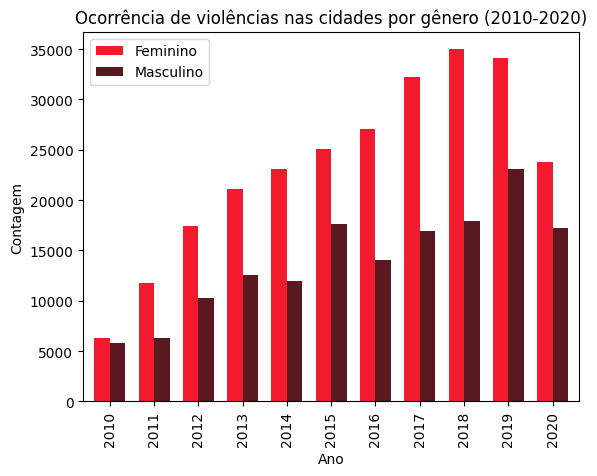

In [120]:
# plotando o gráfico

plt.figure(figsize=(9,5))

df_vit_genero_ano.plot.bar(color = ['#F21B2D', '#59191E'], width = 0.7)

plt.title('Ocorrência de violências nas cidades por gênero (2010-2020)')
plt.xlabel('Ano')
plt.ylabel('Contagem')
plt.legend(loc=2)

plt.show()

#### **3.2. Homens e mulheres estão expostos, na mesma proporção, aos diferentes tipos de violência?**

No geral, aproximadamente 80% das ocorrências são de violência física. Ao considerar o tipo de violência, as mulheres são predominantemente vítimas de violência sexual, psicológica/moral, tortura, tráfico humano e violência física. Já os homens são mais frequentemente vítimas de violência por intervenção legal e trabalho infantil.

In [121]:
# contagem dos tipos de violência

df_dados['TIPO_VIOL'].value_counts(normalize= True)*100

TIPO_VIOL
Física                  79.81
Negligência/abandono     7.53
Sexual                   6.84
Psicológica/moral        4.81
Trabalho infantil        0.49
Sem informação           0.17
Intervenção legal        0.16
Financeira/econômica     0.09
Tortura                  0.07
Tráfico humano           0.01
Name: proportion, dtype: float64

In [122]:
#agrupando os tipos de violência por gênero

df_tipo_viol = df_dados['SEXO'].groupby(df_dados['TIPO_VIOL']).value_counts(normalize= True)*100
df_tipo_viol = df_tipo_viol.unstack().sort_values('Feminino', ascending= False).drop(['Sem informação'], axis= 1)
df_tipo_viol

SEXO,Feminino,Masculino
TIPO_VIOL,,
Sexual,87.61,12.39
Psicológica/moral,84.69,15.28
Tortura,67.97,32.03
Tráfico humano,65.45,34.55
Física,61.56,38.41
Financeira/econômica,55.96,44.04
Sem informação,44.27,55.73
Negligência/abandono,40.21,59.64
Trabalho infantil,21.47,78.53


<Figure size 900x500 with 0 Axes>

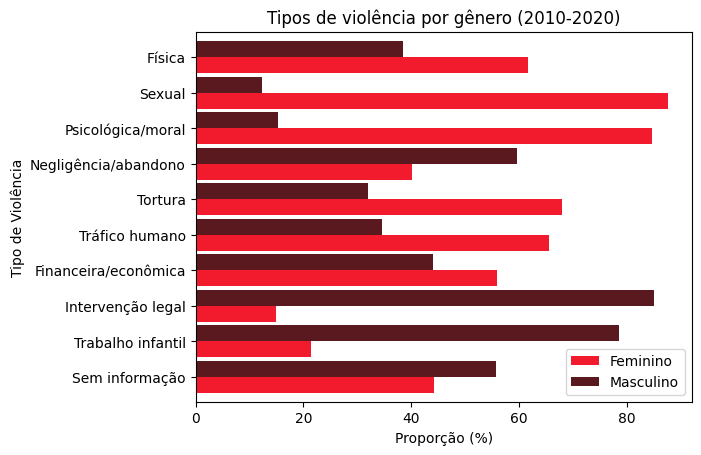

In [123]:
# plotando o gráfico

plt.figure(figsize=(9,5))

rotulos_tipo_viol = ['Sem informação', 'Trabalho infantil', 'Intervenção legal', 'Financeira/econômica',
                     'Tráfico humano', 'Tortura', 'Negligência/abandono', 'Psicológica/moral', 'Sexual', 'Física']

df_tipo_viol.loc[rotulos_tipo_viol].plot.barh(color = ['#F21B2D', '#59191E', '#F2ACB2'], width = 0.9)

plt.title('Tipos de violência por gênero (2010-2020)')
plt.xlabel('Proporção (%)')
plt.ylabel('Tipo de Violência')
plt.legend(loc=4)

plt.show()

#### **3.3. Mulheres estão mais suscetíveis a sofrer violência sexual nas cidades?**

Analisando as ocorrências de violência sexual, o estupro é o tipo mais registrado, e as mulheres são as principais vítimas desse tipo de violência nas cidades.

In [124]:
# contagem dos tipos de violência sexual

df_dados['VIOL_SEX_ESPEC'].value_counts(normalize= True)*100

VIOL_SEX_ESPEC
Não se aplica                 88.73
Estupro                       10.46
Outros                         0.37
Atentado violento ao pudor     0.24
Exploração sexual              0.14
Pornografia infantil           0.06
Name: proportion, dtype: float64

In [125]:
df_viol_sex = df_dados['SEXO'].groupby(df_dados['VIOL_SEX_ESPEC']).value_counts(normalize= True)*100
df_viol_sex = df_viol_sex.unstack().sort_values('Feminino', ascending= False).drop(['Sem informação'], axis= 1)
df_viol_sex

SEXO,Feminino,Masculino
VIOL_SEX_ESPEC,,
Estupro,90.68,9.30
Exploração sexual,80.00,20.00
Outros,79.68,20.25
Atentado violento ao pudor,70.18,29.82
Pornografia infantil,69.60,30.40
Não se aplica,59.11,40.86


<Figure size 900x500 with 0 Axes>

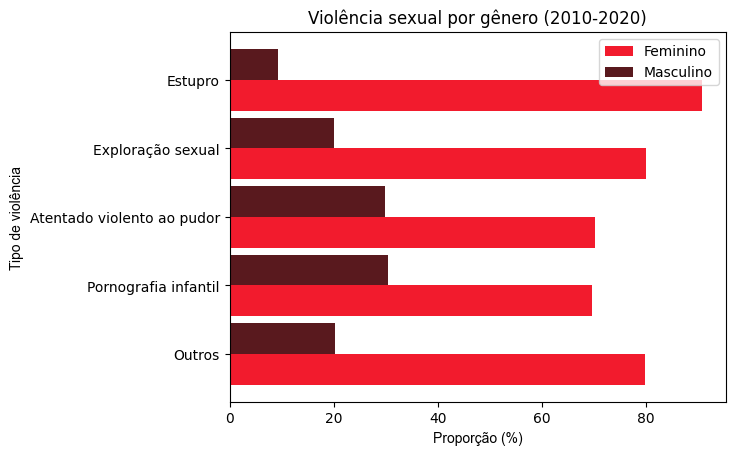

In [126]:
# plotando o gráfico

plt.figure(figsize=(9,5))

rotulos_viol_sex = ['Outros', 'Pornografia infantil', 'Atentado violento ao pudor', 'Exploração sexual', 'Estupro']

df_viol_sex.loc[rotulos_viol_sex].plot.barh(color = ['#F21B2D', '#59191E'], width = 0.9)

plt.title('Violência sexual por gênero (2010-2020)')
plt.xlabel('Proporção (%)', fontname= 'Arial')
plt.ylabel('Tipo de violência', fontname= 'Arial')
plt.legend(loc=1)

plt.show()

### **4. Referências**

- dados_violencia_local_ocorrencia_sinan_2010_2020.csv: https://datasus.saude.gov.br/transferencia-de-arquivos/

- Dicionário de variáveis SINAN: http://www.portalsinan.saude.gov.br/images/documentos/Agravos/via/DIC_DADOS_NET_Violencias_v5.pdf / https://svs.aids.gov.br/bases_vigitel_viva/dic_var/viva_cont/dicionario-de-Variaveis_VIVASINAN.pdf